In [149]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import sqlalchemy as sql
import sqlite3

import random

In [150]:
colors = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

In [4]:
#getting aw data and storing in a sqlite database
data = pd.read_csv("telco_churn.csv")
db_name = 'telco.db'
conn = sqlite3.connect(db_name)
data.to_sql('raw_data', con=conn, if_exists='replace')

In [5]:
engine = sql.create_engine("sqlite:///telco.db")
engine.table_names()
data = pd.read_sql('select * from raw_data', engine)

In [6]:
data.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
56.95*34

1936.3000000000002

In [8]:
data.drop('index', axis=1, inplace=True)
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [9]:
print(f'num rows: {data.shape[0]} \nnum columns:  {data.shape[1]}')

num rows: 7043 
num columns:  21


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Total charges should be float but was brought in as object, so lets change it
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Now we can see from above that there are some null values so lets see. 
data[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# since we have only 11 null values in this entry, we will drop them 
data.dropna(how = 'any', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


No     5163
Yes    1869
Name: Churn, dtype: int64

In precentages
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


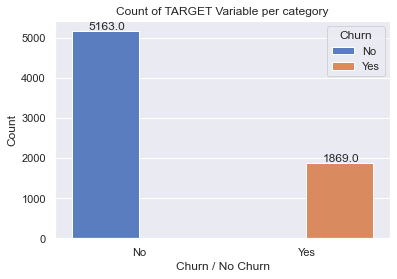

In [15]:
#we take a look at the churn/ no charn rate in the data 
print(data['Churn'].value_counts())
print('')
print("In precentages")
print(f"{100*data['Churn'].value_counts(normalize = True)}")

#plotting results
ax = sns.countplot(x='Churn', hue= 'Churn', data = data, palette=random.choice(colors))
# data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.savefig('./pics/imbalace.png')
plt.show()

* So we can see our data is very imbalanced. 

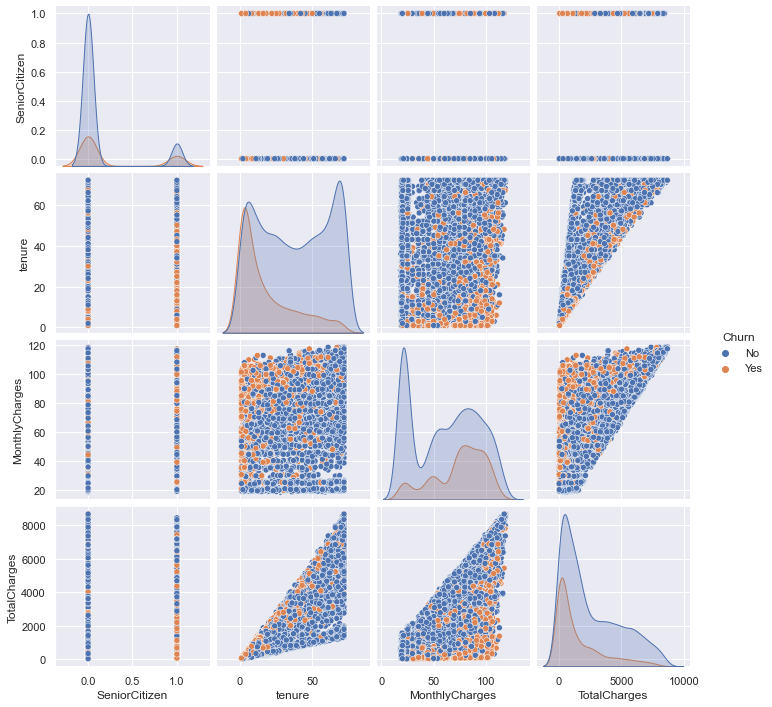

In [16]:
sns.pairplot(data.drop('customerID', axis=1), hue='Churn')
plt.savefig('./pics/num_pairplot.png')
plt.show()

In [17]:
#droping customer id prmanently as we wont need it
data = data.drop('customerID', axis=1)

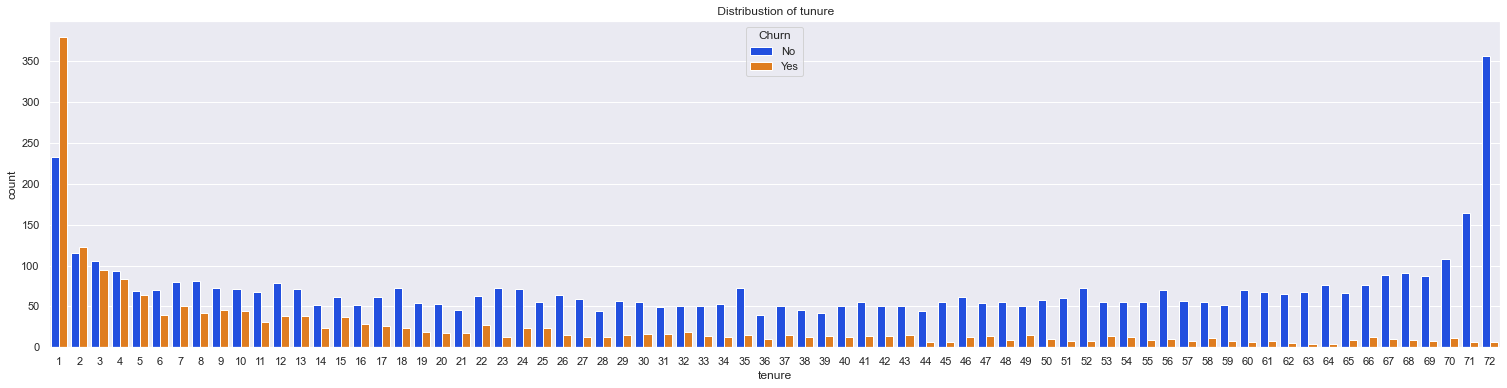

In [18]:
plt.figure(figsize=(26,6))
sns.countplot(x='tenure', hue= 'Churn', data = data, palette= 'bright')
plt.title(' Distribustion of tunure')
plt.savefig('./pics/tenure.png')
plt.show()

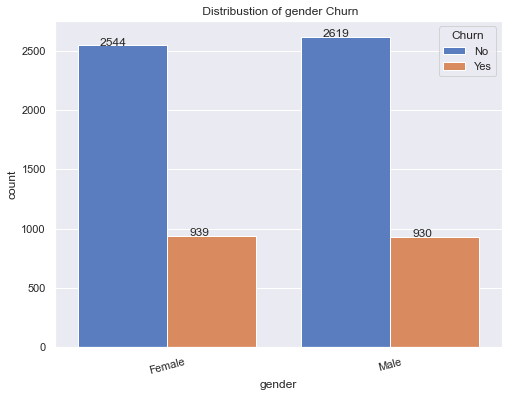

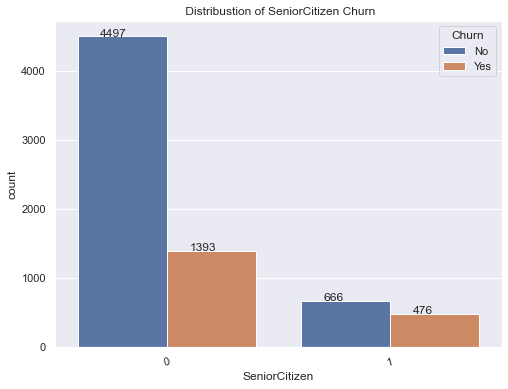

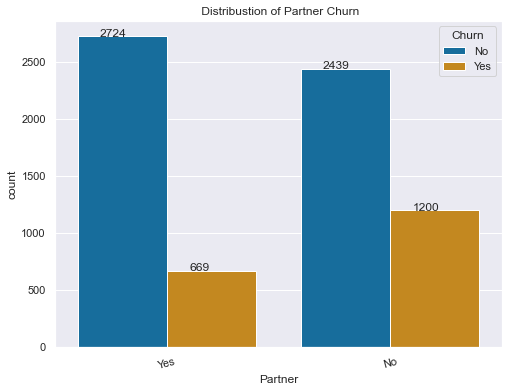

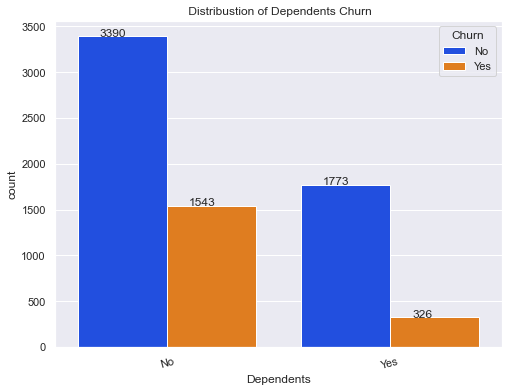

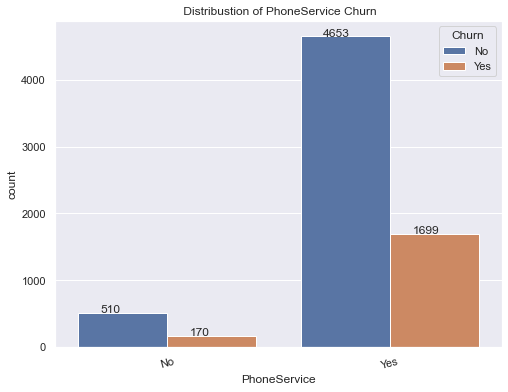

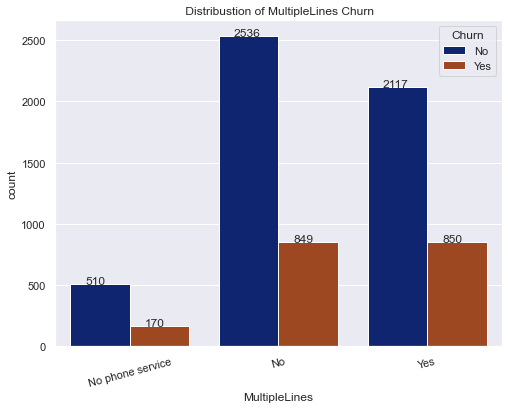

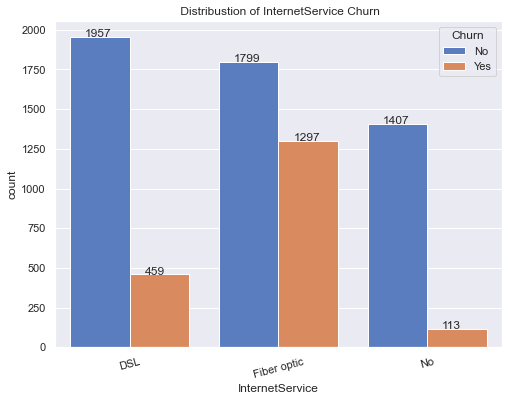

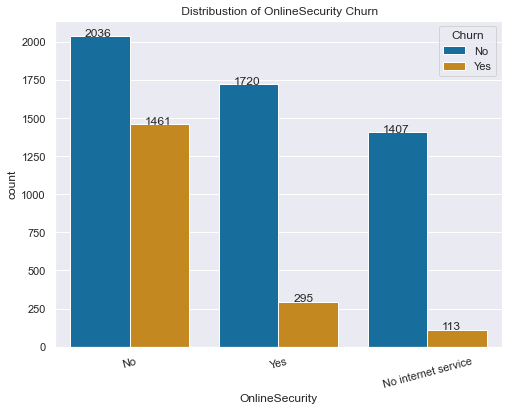

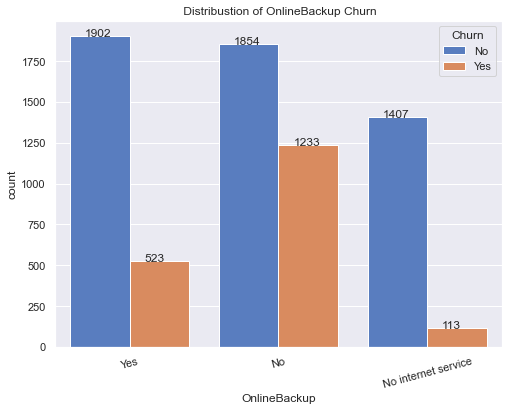

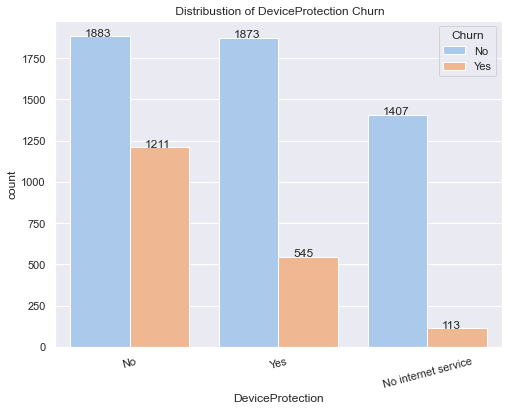

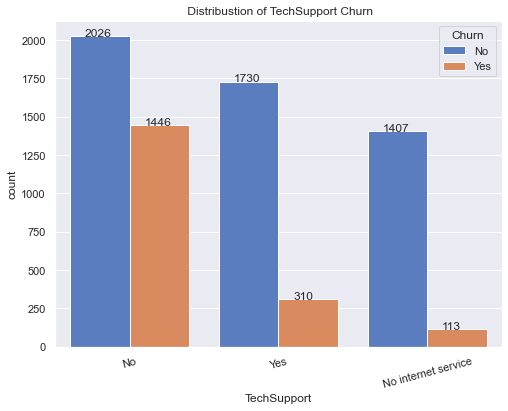

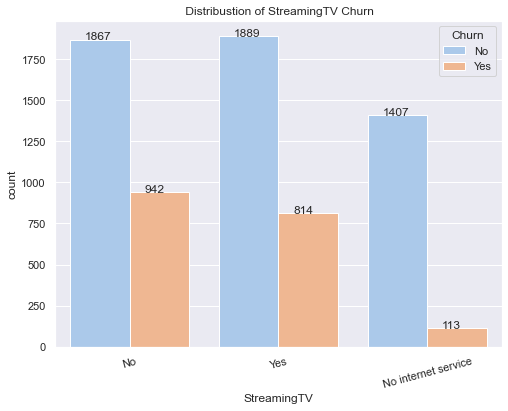

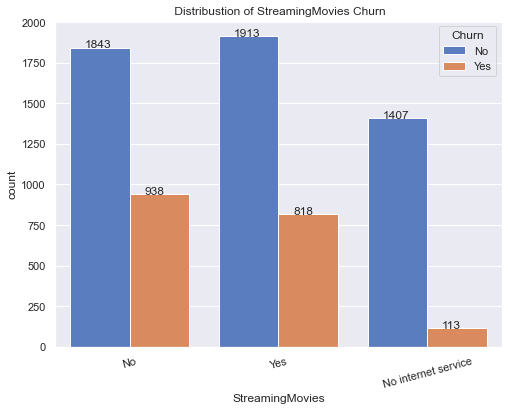

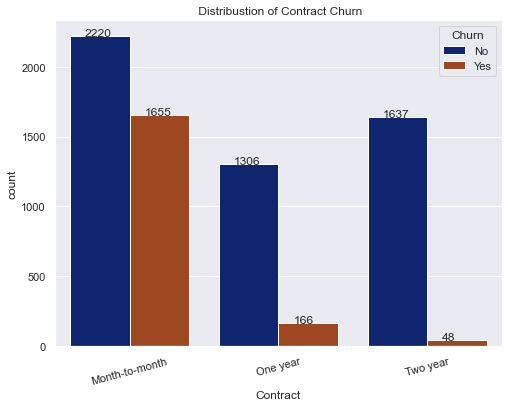

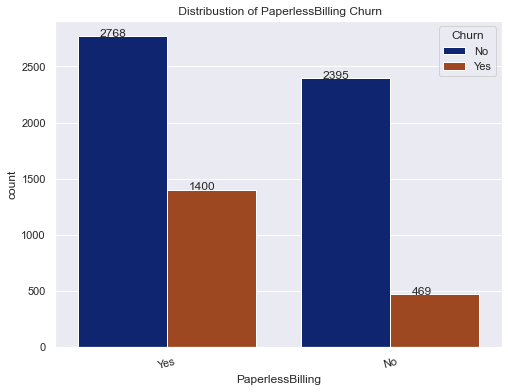

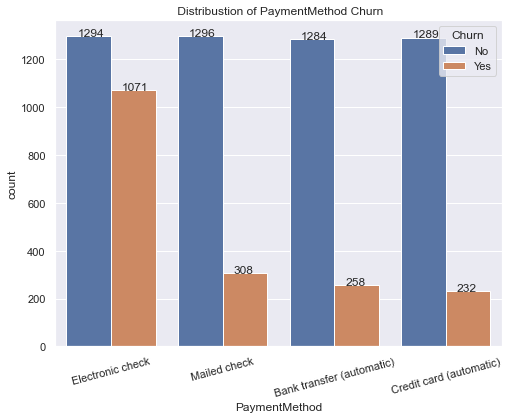

In [19]:
# Lets take look at a count distribution with all our other feature with countplot

colors = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
for col in data.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis=1):
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=f'{col}', hue= 'Churn', data = data, palette=random.choice(colors))
    plt.title(f' Distribustion of {col} Churn')
    plt.xticks(rotation=15)
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    plt.savefig(f'./pics/uni_{col}_churn.png')
    plt.show()


In [20]:
data.loc[data["Churn"]=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


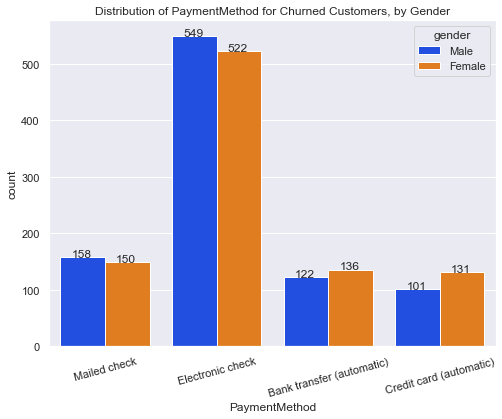

In [21]:
plt.figure(figsize=(8,6))
ax = sns.countplot( data = data.loc[data["Churn"]=='Yes'], x= 'PaymentMethod', hue = 'gender',palette='bright',)
plt.title('Distribution of PaymentMethod for Churned Customers, by Gender')
plt.xticks(rotation=15)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.savefig('./pics/bi_pm.png')
plt.show;

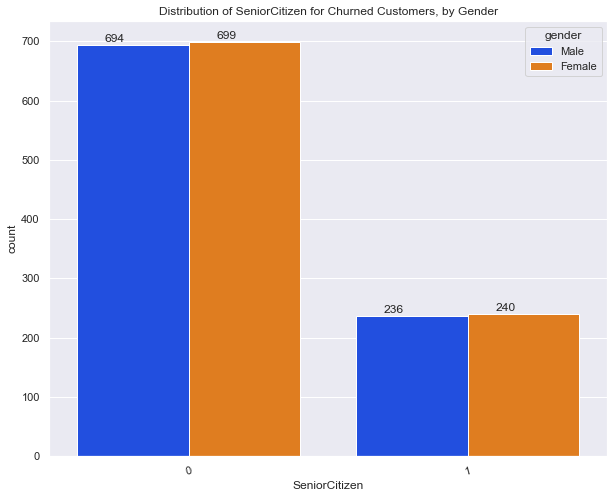

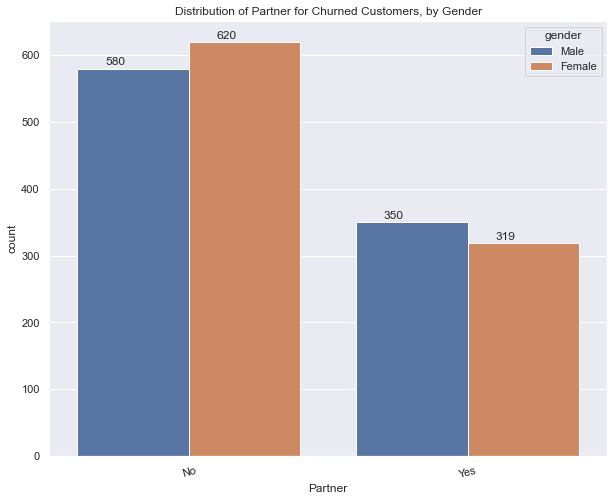

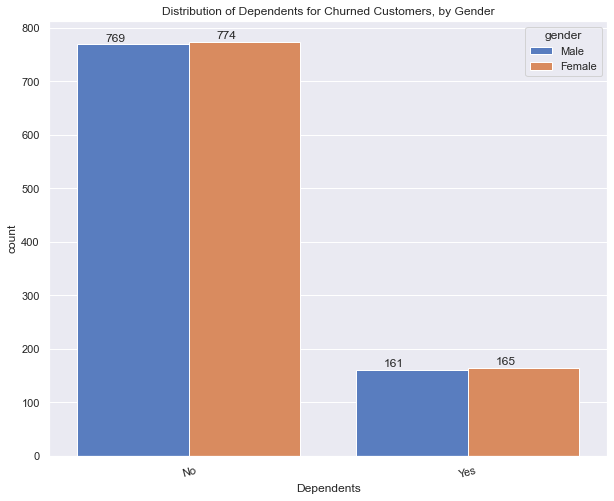

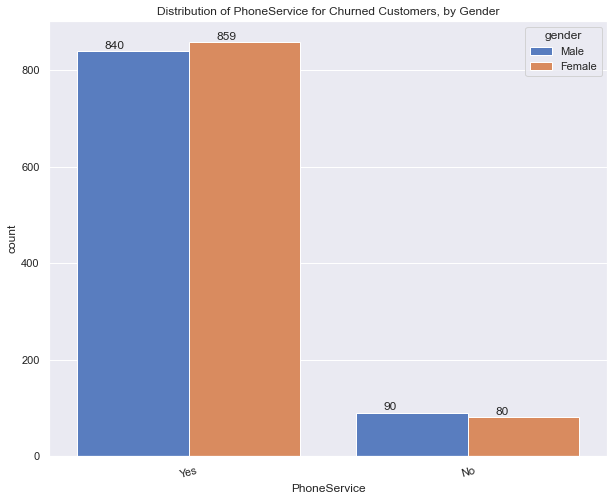

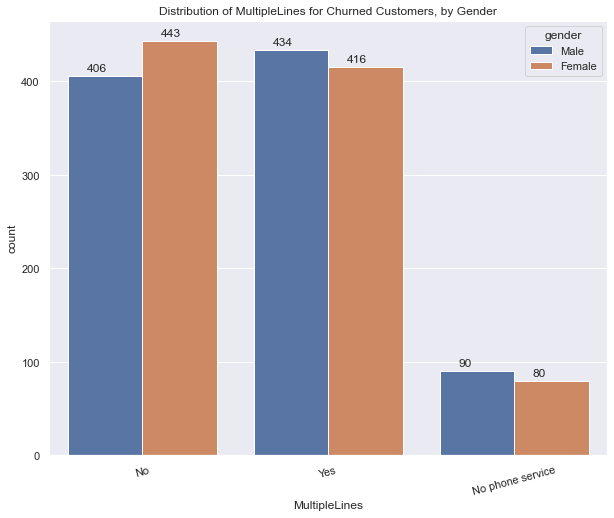

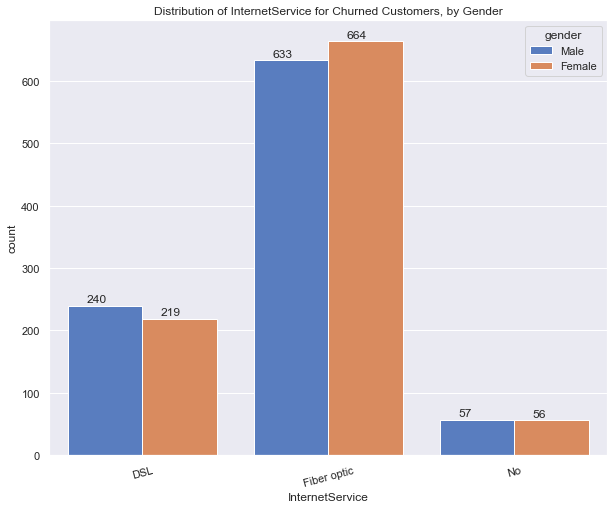

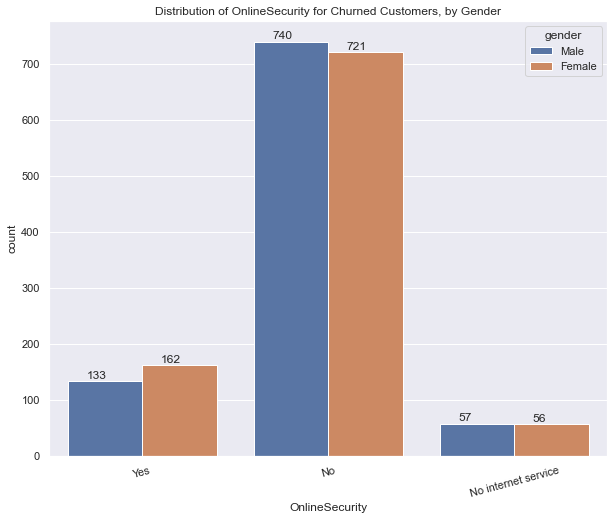

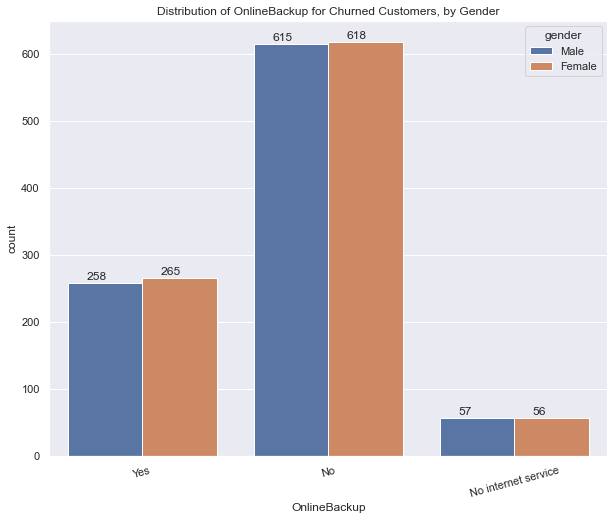

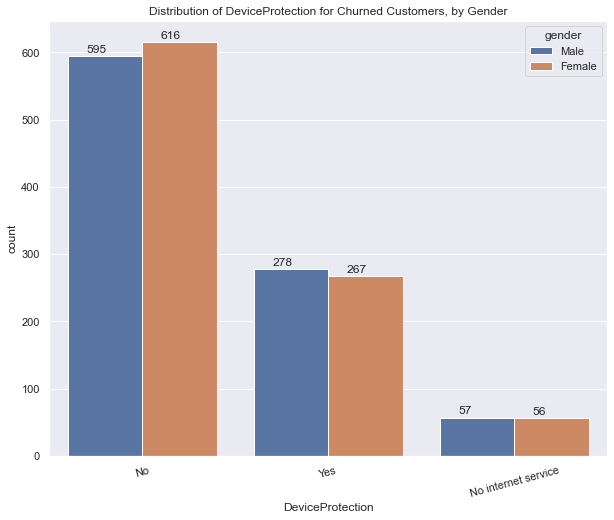

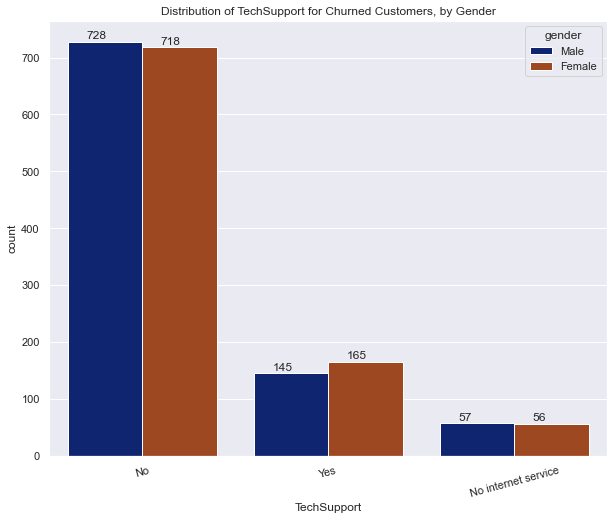

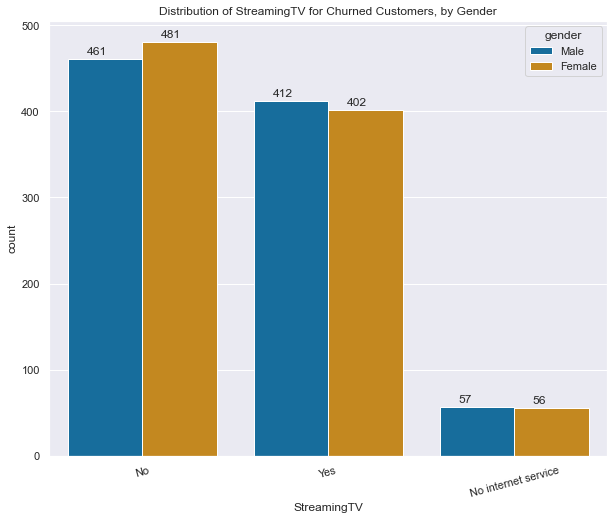

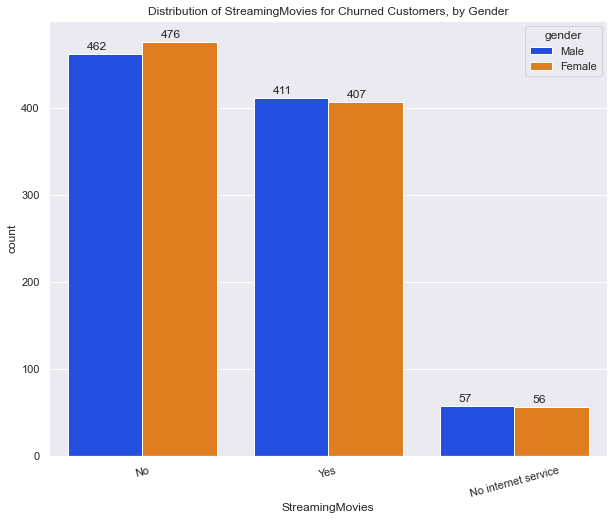

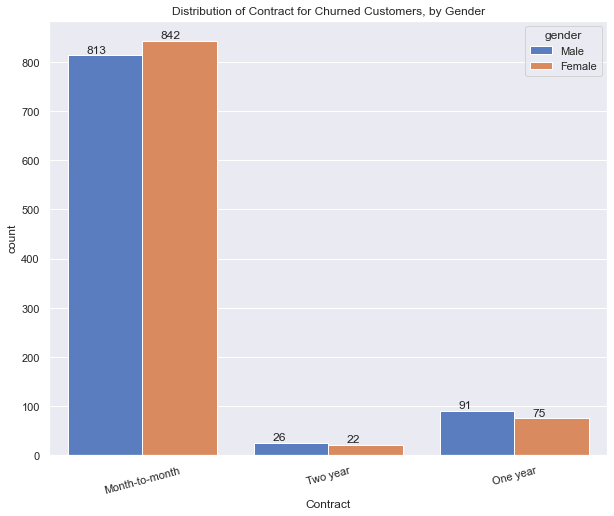

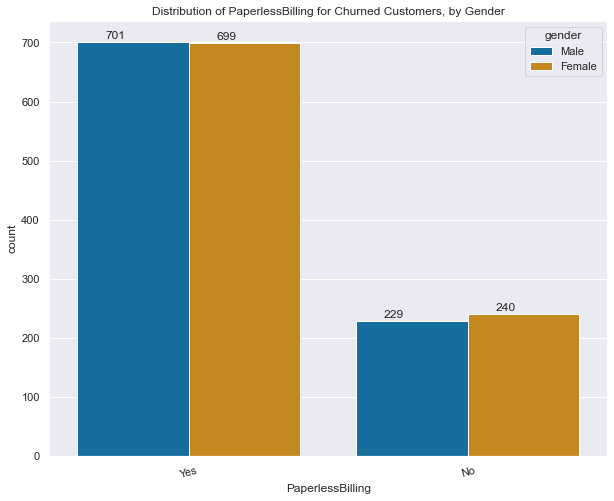

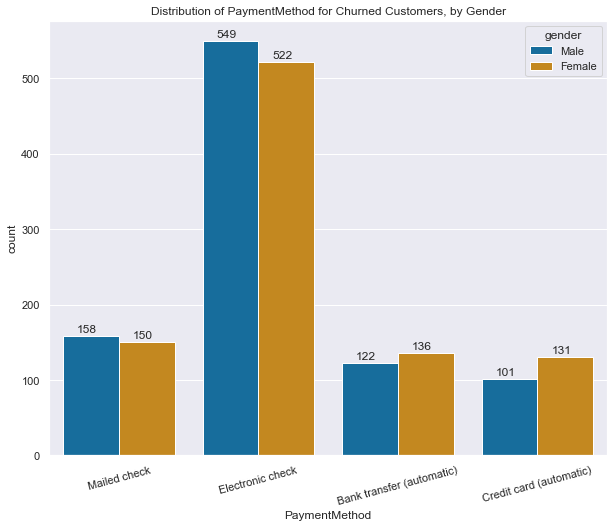

In [22]:
colors = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
for col in data.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure', 'gender'], axis=1):
    plt.figure(figsize=(10,8))
    ax = sns.countplot( data = data.loc[data["Churn"]=='Yes'], x= f'{col}', hue = 'gender',palette=random.choice(colors))
    plt.title(f'Distribution of {col} for Churned Customers, by Gender')
    plt.xticks(rotation=15)
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    plt.savefig(f'./pics/bi_{col}.png')
    plt.show;


### Baseline with simple Logistic regresion with the few numerical features

In [23]:
slim_data= data[['SeniorCitizen', 'tenure','MonthlyCharges','TotalCharges','Churn']]

In [24]:
slim_data['Churn'] = np.where(slim_data.Churn == 'Yes',1,0)

In [25]:
slim_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (log_loss, fbeta_score, recall_score, confusion_matrix, accuracy_score, 
                             precision_recall_fscore_support, precision_score)


In [27]:
X= slim_data.drop('Churn', axis=1)
y=slim_data['Churn']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [29]:
base_lr = LogisticRegression(C=100)
base_lr.fit(x_train, y_train)
base_preds= base_lr.predict(x_test)


In [30]:
print(f'Recall score: {recall_score(y_test, base_preds)} ')
print(f'F2 score: {fbeta_score(y_test, base_preds,beta=2)} ')
print('')
print('confusion_matrix:')
confusion_matrix(y_test, base_preds)

Recall score: 0.4358288770053476 
F2 score: 0.46385885031303353 

confusion_matrix:


array([[935,  98],
       [211, 163]])

In [31]:
accuracy_score(y_test, base_preds)

0.7803837953091685

In [ ]:
sns.set_style("whitegrid")


* The priority is f2 scores so we will find a way to increase our f2 as much as possible

* so we will bring in all our data including categorical ones, then make dummies for it

In [32]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
# let make coppy of the main data and pre-process the copied one
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
full_data = data.copy()
full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [34]:
full_data = pd.get_dummies(full_data, drop_first = True)
full_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


* we can take a look at our feature correlation

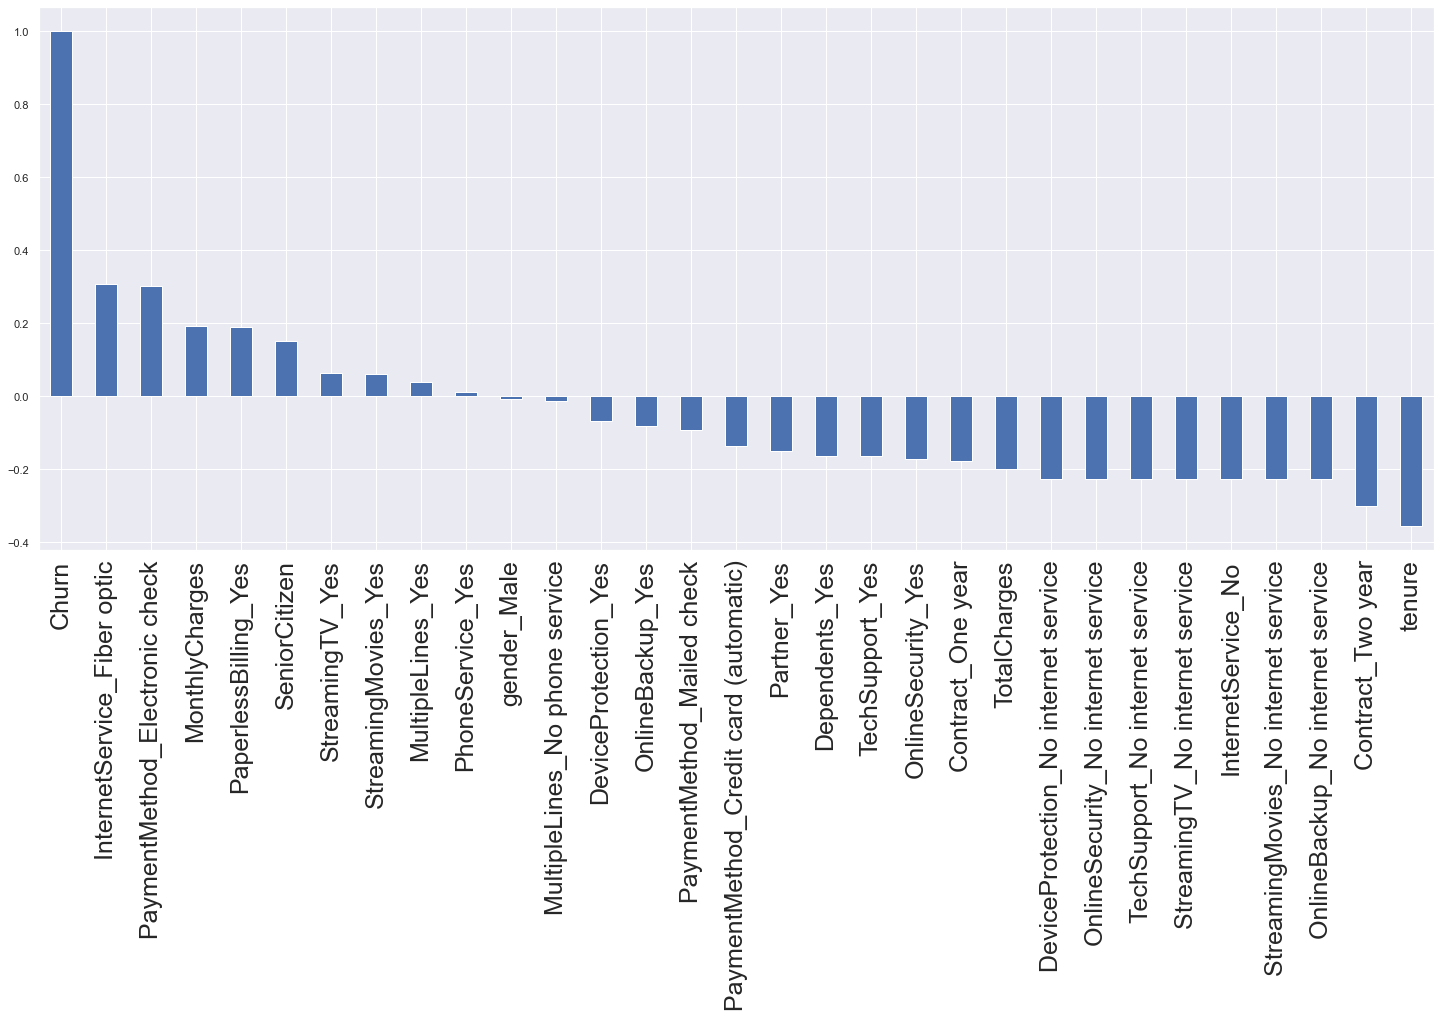

In [35]:

plt.figure(figsize=(25,10))
ax = full_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xticks(fontsize=25, rotation=90)
plt.savefig('./pics/corr.png');

In [36]:
full_data.shape

(7032, 31)

* ##  Now lets start modeling with this data use this data 

In [37]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [38]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.2, random_state=42)

In [40]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4500, 30), (4500,), (1125, 30), (1125,), (1407, 30), (1407,))

In [41]:
clf = LogisticRegression(C=100)
clf.fit(x_train, y_train)
val_preds= clf.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, val_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, val_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, val_preds)

Val Recall score: 0.5346534653465347 
Val F2 score: 0.5547945205479452 

 val confusion_matrix:


array([[736,  86],
       [141, 162]])

In [42]:
accuracy_score(y_val, val_preds)

0.7982222222222223

* ### lets do the same with CV

In [43]:
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_cv = LogisticRegressionCV(cv=kf, random_state=42, Cs=c_list)
clf_cv.fit(x_train, y_train)
cv_preds= clf_cv.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, cv_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, cv_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, cv_preds)

Val Recall score: 0.5544554455445545 
Val F2 score: 0.5745554035567716 

 val confusion_matrix:


array([[740,  82],
       [135, 168]])

In [44]:
accuracy_score(y_val, cv_preds)

0.8071111111111111

In [45]:
clf_cv.C_

array([0.1004004])

* #### So we can see above that there is a slight improvement from regular to cv but not too much

* ### now we can focus on some class imbalance techniques

  1. Lests start with threshold adjustment 


In [46]:
# packages needed for this notebook: MLXTEND, IMBALANCED-LEARN
# !pip install mlxtend
# !conda install -c conda-forge imbalanced-learn -y

Logistic Regression Model best F2 score 0.770 at prob decision threshold >= 0.196


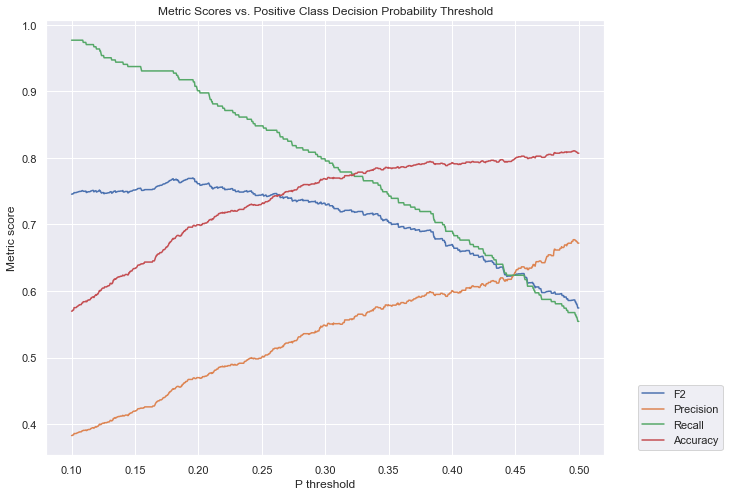

In [47]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_cv.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* So I can get an F2 score of .770 with a threshold of .196, but im not quite satisfied yet, I will go ahead and try oversampling first before adjusting threshold

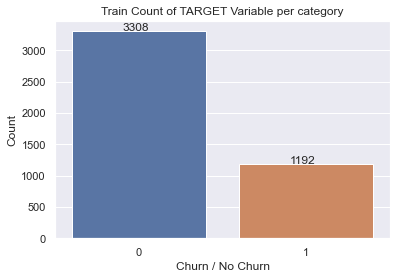

In [48]:
ax = sns.countplot(x= y_train)
# data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Train Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

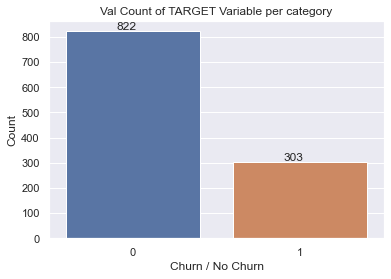

In [49]:
ax = sns.countplot(x= y_val )
plt.title("Val Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

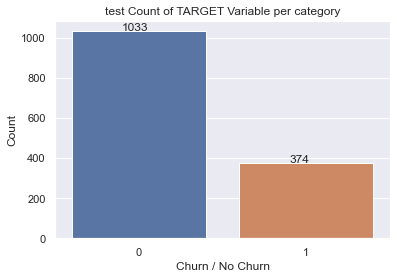

In [50]:
ax = sns.countplot(x= y_test)
plt.title("test Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [51]:
from imblearn.over_sampling import ADASYN
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [52]:
x_adasyn, y_adasyn = ADASYN(random_state=42).fit_resample(x_train, y_train)

In [53]:
Counter(y_train)

Counter({0: 3308, 1: 1192})

In [54]:
Counter(y_adasyn)

Counter({0: 3308, 1: 3325})

In [55]:
# fit log reg with adasyn data
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_adasyn = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_adasyn.fit(x_adasyn, y_adasyn)
ada_preds= clf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, ada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, ada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_preds)

Val Recall score: 0.7029702970297029 
Val F2 score: 0.6668753913587977 

 val confusion_matrix:


array([[650, 172],
       [ 90, 213]])

* #### Now lets adjust threshold with this model

Logistic Regression Model best F2 score 0.750 at prob decision threshold >= 0.130


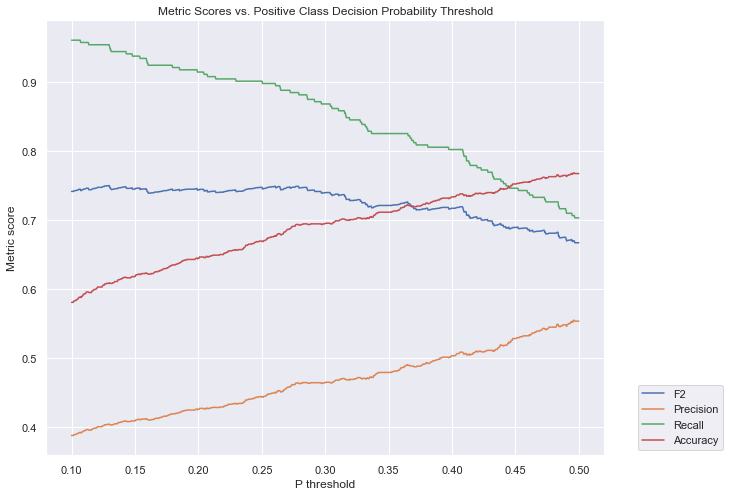

In [56]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* Here we are doing a little worse than just the threshold adjusting

* ### Why dont we Try SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
x_smoted, y_smoted = SMOTE(random_state=42).fit_resample(x_train,y_train)

In [59]:
Counter(y_smoted)

Counter({0: 3308, 1: 3308})

In [60]:
# fit log reg with smote data
c_list = np.linspace(.10,10,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_smt = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_smt.fit(x_smoted, y_smoted)
smt_preds= clf_smt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, smt_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, smt_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, smt_preds)

Val Recall score: 0.7194719471947195 
Val F2 score: 0.6829573934837093 

 val confusion_matrix:


array([[656, 166],
       [ 85, 218]])

In [61]:
clf_smt.C_

array([1.08108108])

In [62]:
accuracy_score(y_val,smt_preds )

0.7768888888888889

Logistic Regression Model best F2 score 0.752 at prob decision threshold >= 0.162


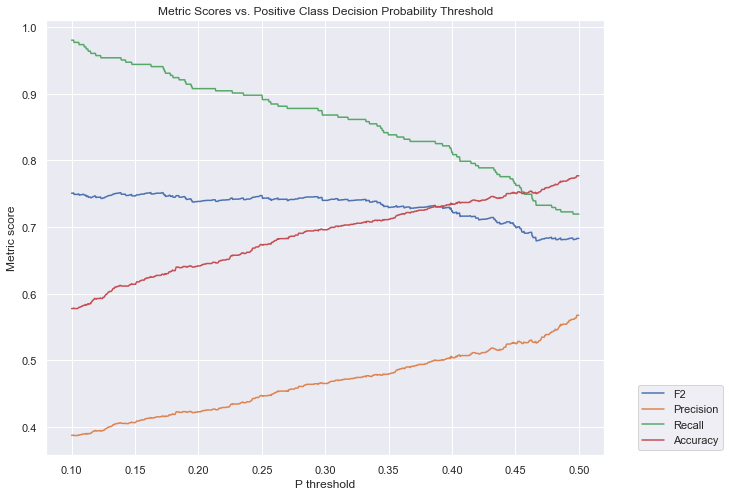

In [63]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_smt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* still stand alone threshold adjustment leading with Log reg

In [64]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%config InlineBackend.figure_formats = ['svg']  # or 'retina'

from sklearn.metrics import fbeta_score, make_scorer

In [65]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [66]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
f2_scorer = make_scorer(fbeta_score, beta=2)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f2_scorer)

print(scores)

[0.44880785 0.52269601 0.48882682 0.48696845 0.45454545 0.55479452
 0.46984572 0.47619048 0.48251748 0.46033994]


In [67]:
# search for an optimal value of K for KNN
k_range = list(range(1, 41))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f2_scorer)
    k_scores.append(scores.mean())

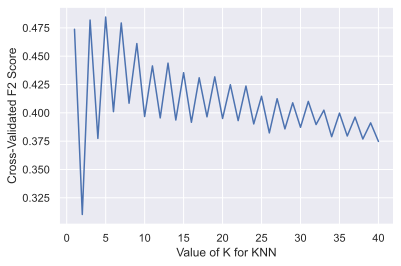

In [68]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F2 Score')
plt.savefig('./pics/knn.png')
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 100))
#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring= f2_scorer)

# fit the grid with data
grid.fit(x_train, y_train);

In [70]:
# view the complete results
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002201,0.000088,0.028889,0.000935,1,{'n_neighbors': 1},0.420561,0.525624,0.507152,0.481283,0.437086,0.519308,0.452092,0.441176,0.508021,0.445205,0.473751,0.036921,4
1,0.002180,0.000043,0.036056,0.001552,2,{'n_neighbors': 2},0.305970,0.346097,0.321375,0.240240,0.304606,0.359281,0.280303,0.317221,0.318182,0.309668,0.310294,0.031262,96
2,0.002179,0.000060,0.045207,0.010413,3,{'n_neighbors': 3},0.473251,0.505464,0.461433,0.494652,0.449591,0.538881,0.453297,0.455182,0.515818,0.471167,0.481874,0.028810,2
3,0.002164,0.000024,0.048502,0.002926,4,{'n_neighbors': 4},0.359238,0.393013,0.346608,0.391304,0.324006,0.423977,0.396476,0.348148,0.434153,0.357675,0.377460,0.034007,40
4,0.002191,0.000037,0.047624,0.004474,5,{'n_neighbors': 5},0.448808,0.522696,0.488827,0.486968,0.454545,0.554795,0.469846,0.476190,0.482517,0.460340,0.484553,0.030770,1


In [71]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 5}
Best estimator:  KNeighborsClassifier()
Best score:  0.48455327301597206


* KNN is doing quite badly with all we tried

* ### Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.25, random_state=42)

In [75]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dt_pred)} ')
print(f'Val F2 score: {fbeta_score(y_val, dt_pred,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dt_pred)

Val Recall score: 0.6201550387596899 
Val F2 score: 0.6237006237006236 

 val confusion_matrix:


array([[884, 136],
       [147, 240]])

In [76]:
dt_tpred=dt.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, dt_tpred)} ')
print(f'Val F2 score: {fbeta_score(y_test, dt_tpred,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, dt_tpred)

Val Recall score: 0.5320855614973262 
Val F2 score: 0.5387114239306984 

 val confusion_matrix:


array([[881, 152],
       [175, 199]])

In [77]:
#lets check with adasyn

Logistic Regression Model best F2 score 0.755 at prob decision threshold >= 0.125


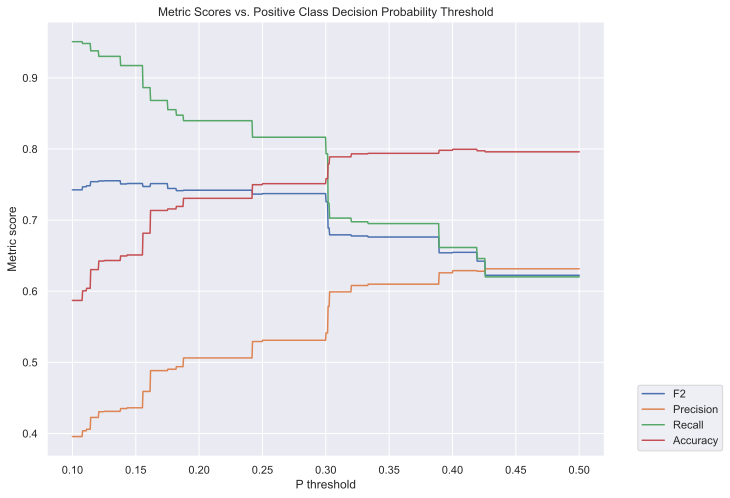

In [78]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('DT Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Decision Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [106]:
# fit log reg with adasyn data

dt_adasyn=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=9, min_samples_leaf=10)
dt_adasyn.fit(x_adasyn, y_adasyn)
dtada_preds= dt_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dtada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, dtada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dtada_preds)

Val Recall score: 0.7493540051679587 
Val F2 score: 0.7008216529724505 

 val confusion_matrix:


array([[789, 231],
       [ 97, 290]])

Logistic Regression Model best F2 score 0.757 at prob decision threshold >= 0.200


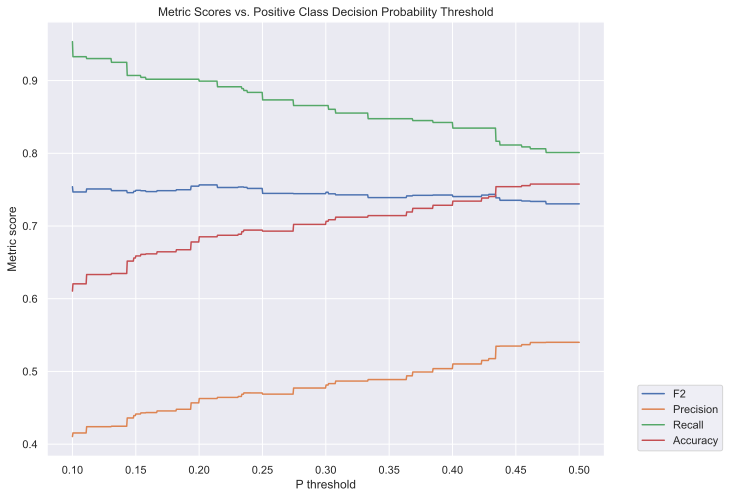

In [80]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

DT Model best test F2 score 0.710 at prob decision threshold >= 0.100


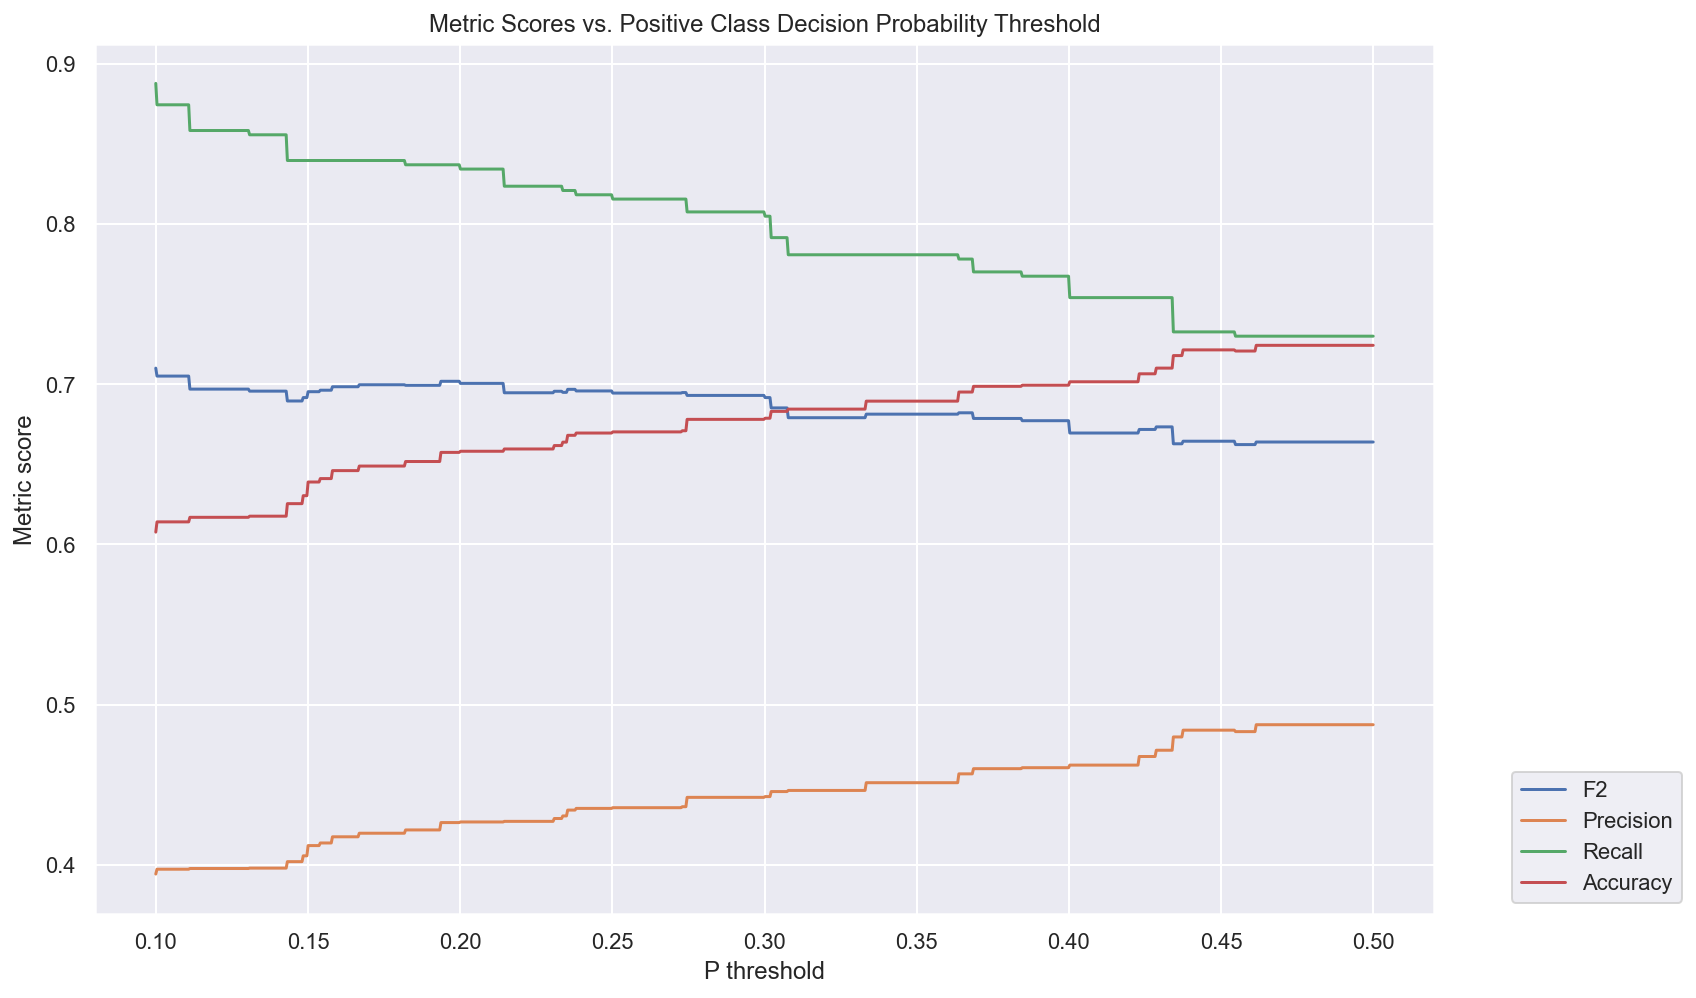

In [110]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = dt_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('DT Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [81]:
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=12)
rf_model.fit(x_train,y_train)
rf_preds=rf_model.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rf_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, rf_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rf_preds)

Val Recall score: 0.5064599483204134 
Val F2 score: 0.5346426623022368 

 val confusion_matrix:


array([[931,  89],
       [191, 196]])

Base RF Model best F2 score 0.770 at prob decision threshold >= 0.176


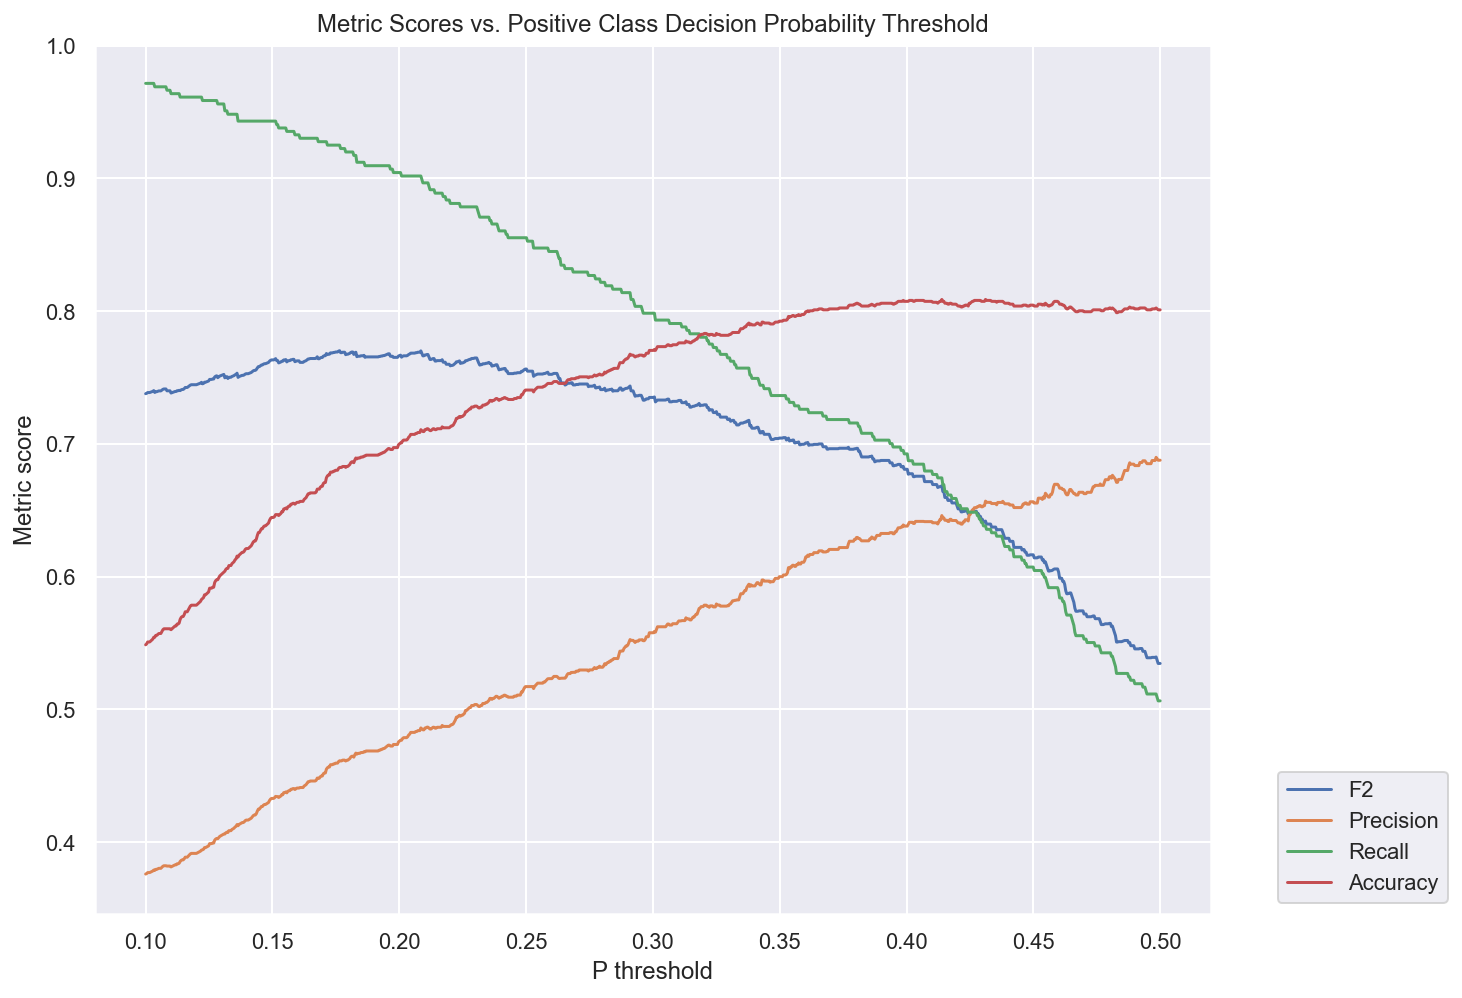

In [117]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_model.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Base RF Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

RF Model best test F2 score 0.745 at prob decision threshold >= 0.179


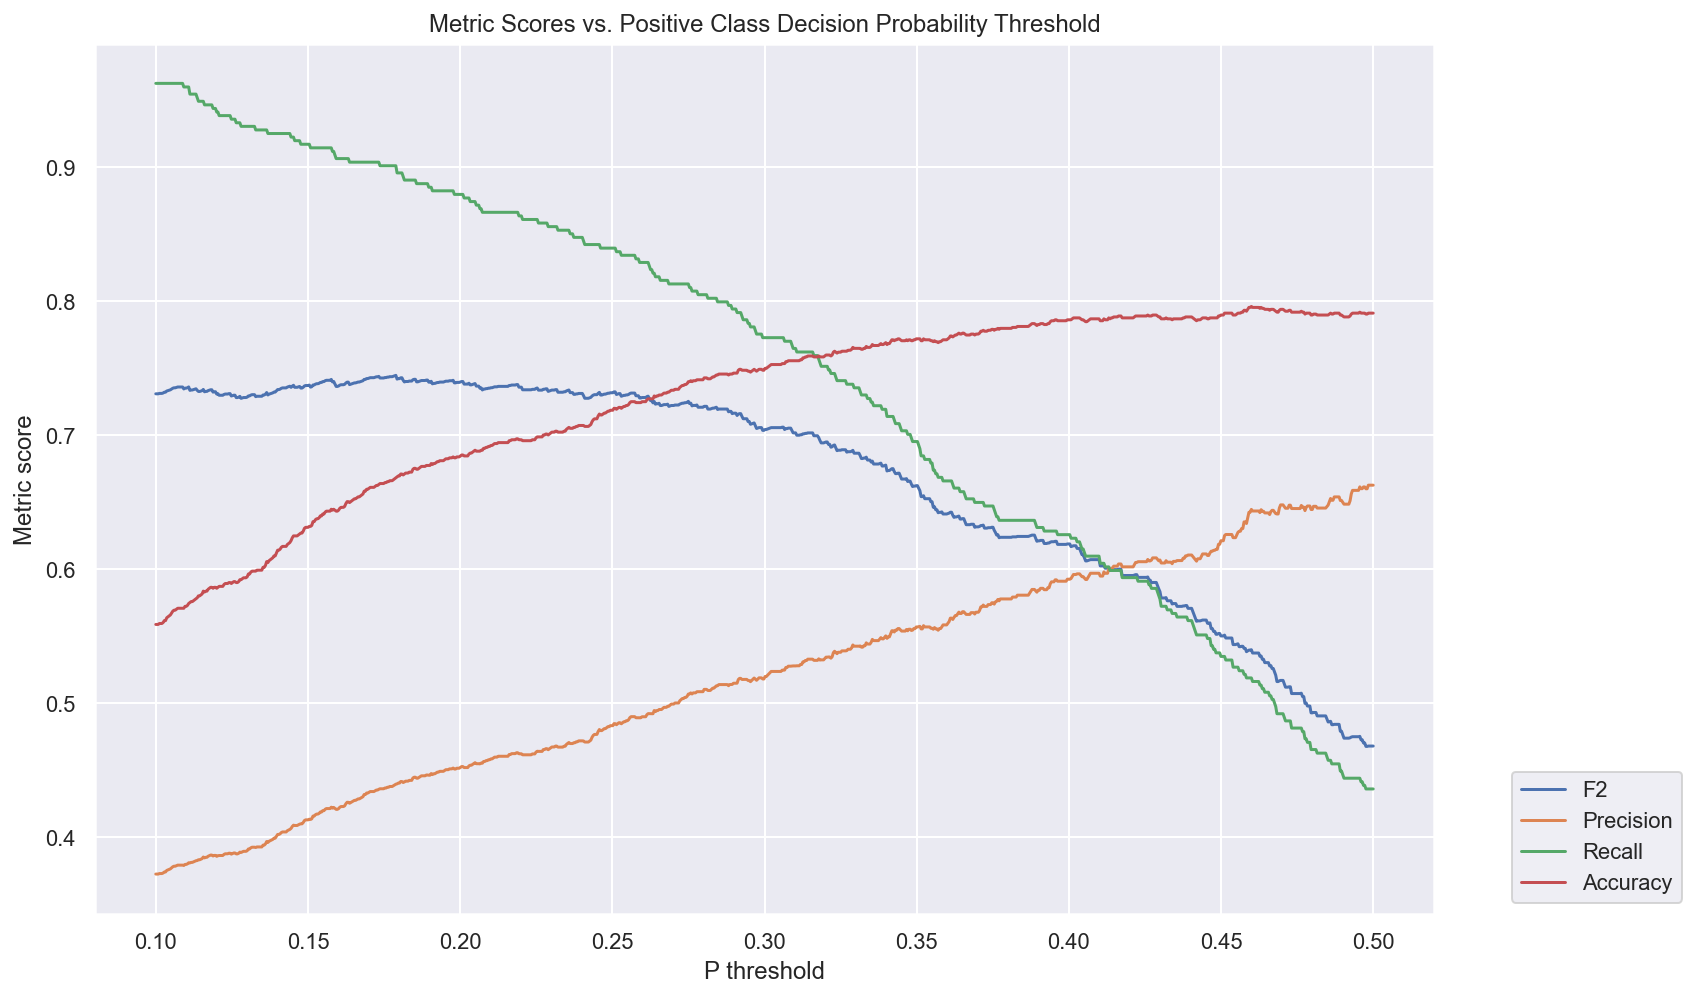

In [111]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_model.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [83]:

rf_adasyn=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=5, min_samples_leaf=12)
rf_adasyn.fit(x_adasyn, y_adasyn)
rfada_preds= rf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rfada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, rfada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rfada_preds)

Val Recall score: 0.7984496124031008 
Val F2 score: 0.7239925023430177 

 val confusion_matrix:


array([[743, 277],
       [ 78, 309]])

RF ADASYN Model best F2 score 0.764 at prob decision threshold >= 0.380


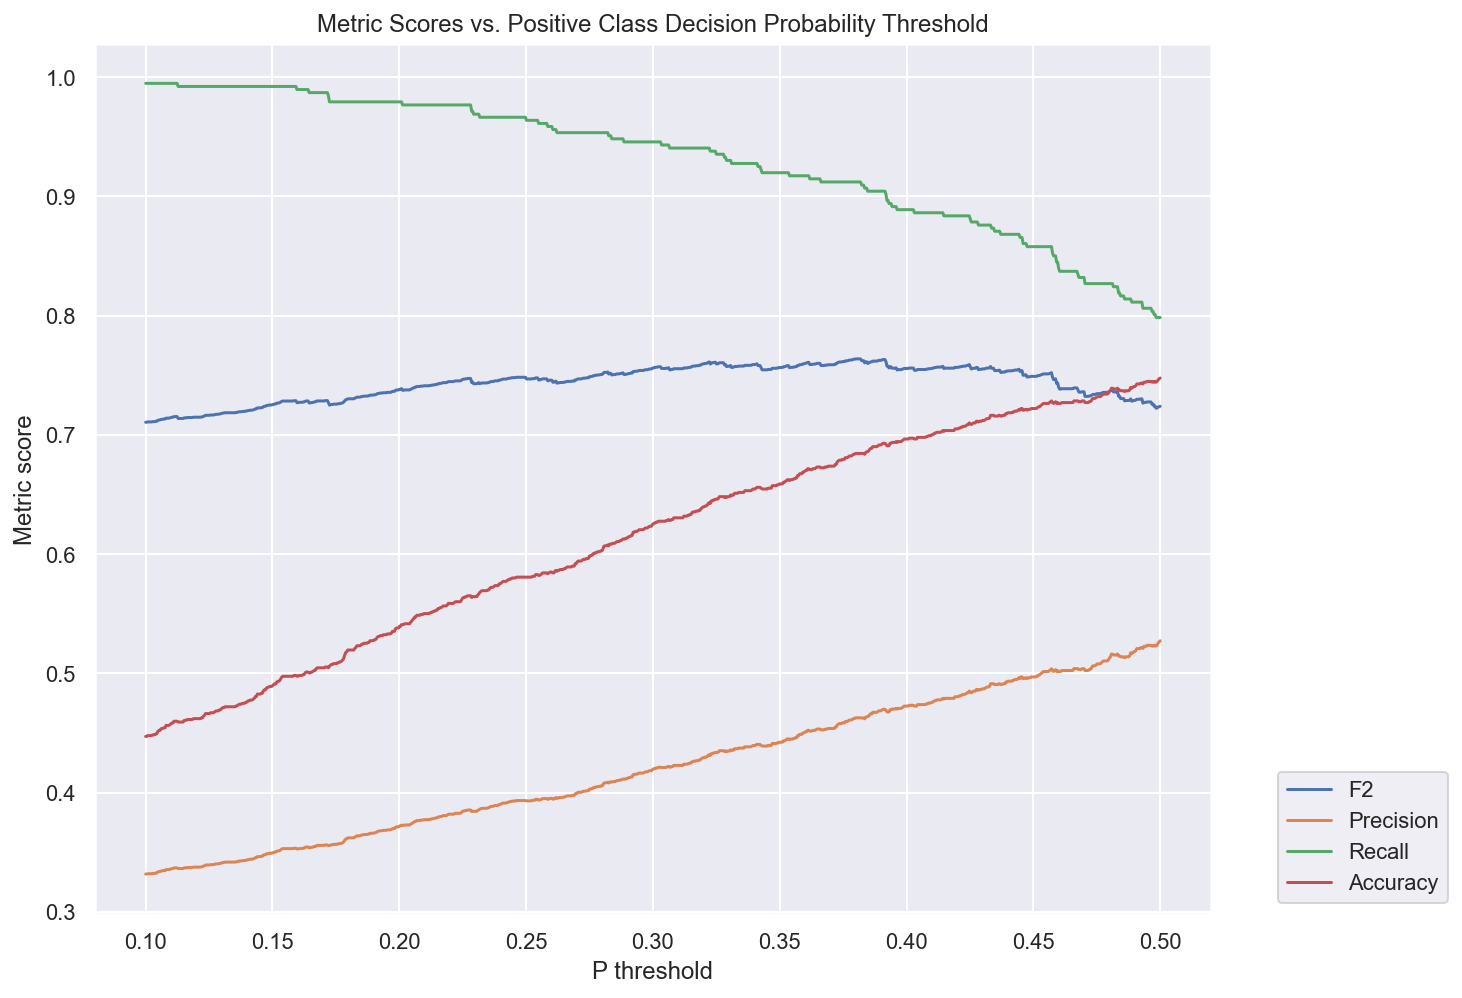

In [116]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('RF ADASYN Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

RF Model best test F2 score 0.741 at prob decision threshold >= 0.234


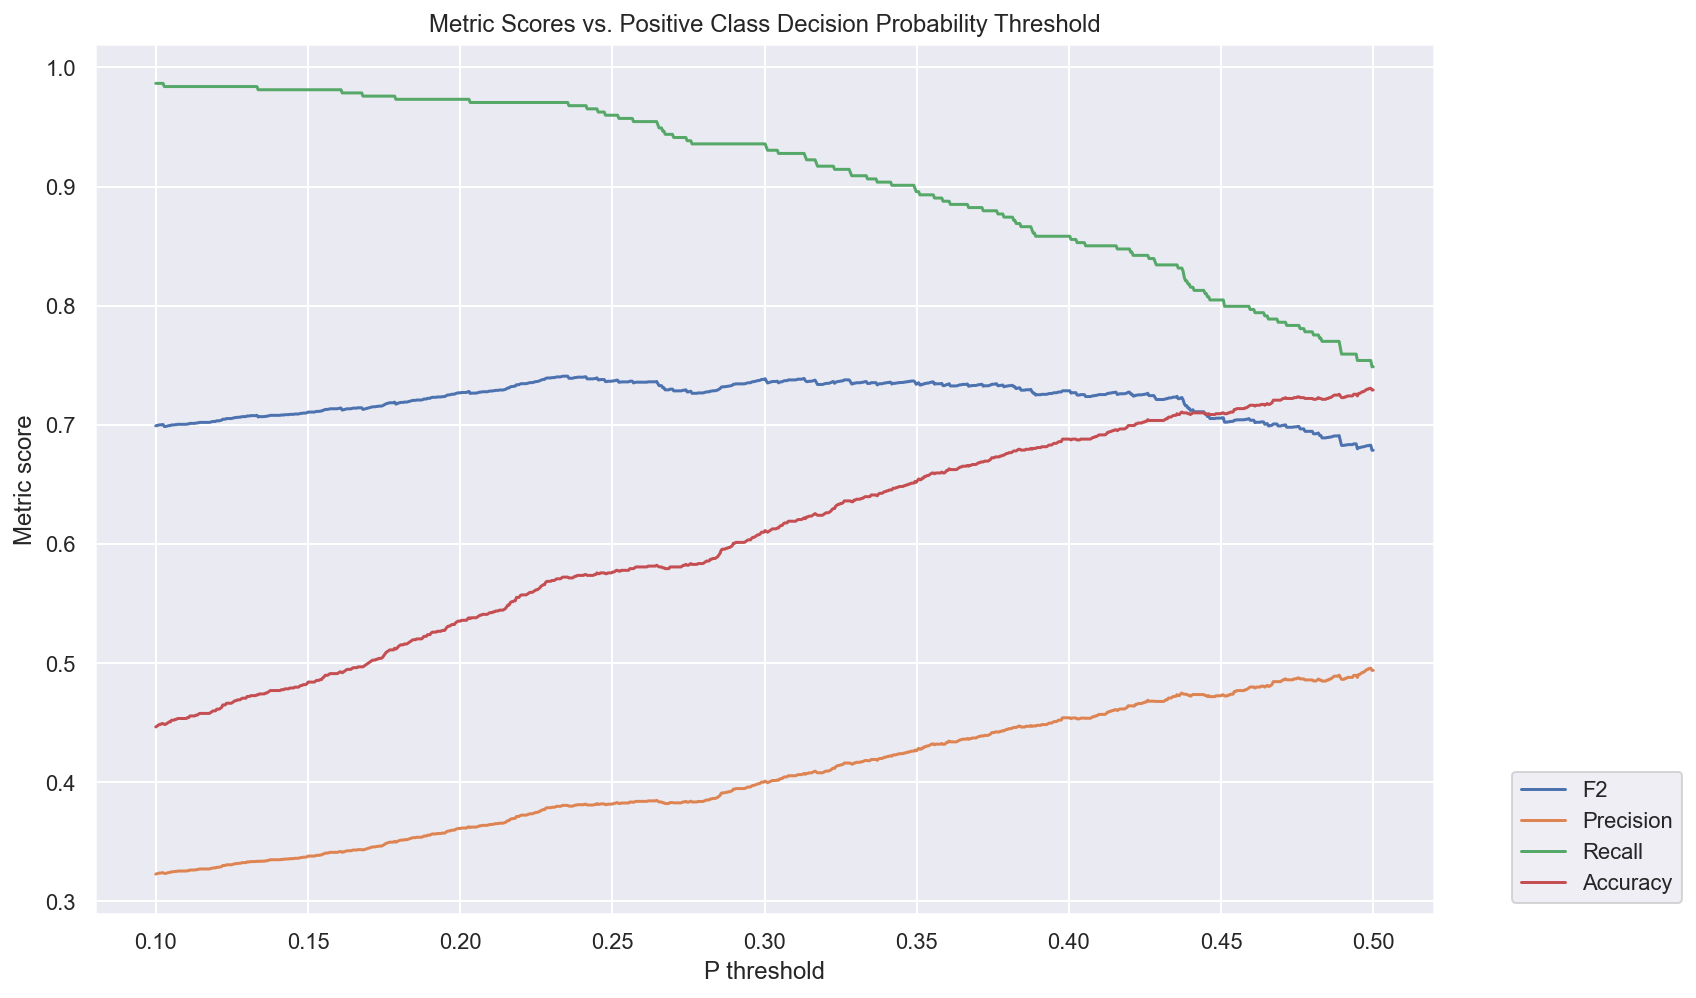

In [112]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('RF ADYSYN best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [90]:
%config InlineBackend.figure_formats = ['retina']

import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix 

In [89]:

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train,
            verbose=True,
            ## the next three arguments set up early stopping.
            early_stopping_rounds=50,
            eval_metric='aucpr',
            eval_set=[(x_val, y_val)])
            

fbeta_score(y_test, clf_xgb.predict(x_test, ntree_limit=clf_xgb.best_ntree_limit), beta=2) 

[0]	validation_0-aucpr:0.64290
[1]	validation_0-aucpr:0.65484
[2]	validation_0-aucpr:0.65762
[3]	validation_0-aucpr:0.65909
[4]	validation_0-aucpr:0.66502
[5]	validation_0-aucpr:0.66557
[6]	validation_0-aucpr:0.67146
[7]	validation_0-aucpr:0.67172
[8]	validation_0-aucpr:0.67385
[9]	validation_0-aucpr:0.67764
[10]	validation_0-aucpr:0.67808
[11]	validation_0-aucpr:0.67888
[12]	validation_0-aucpr:0.67749
[13]	validation_0-aucpr:0.67669
[14]	validation_0-aucpr:0.67281
[15]	validation_0-aucpr:0.67265
[16]	validation_0-aucpr:0.67115
[17]	validation_0-aucpr:0.67181
[18]	validation_0-aucpr:0.67051
[19]	validation_0-aucpr:0.66892
[20]	validation_0-aucpr:0.66921
[21]	validation_0-aucpr:0.66887
[22]	validation_0-aucpr:0.66768
[23]	validation_0-aucpr:0.66690
[24]	validation_0-aucpr:0.66689
[25]	validation_0-aucpr:0.66624
[26]	validation_0-aucpr:0.66529
[27]	validation_0-aucpr:0.66316
[28]	validation_0-aucpr:0.66135
[29]	validation_0-aucpr:0.66127
[30]	validation_0-aucpr:0.65828
[31]	validation_0-

0.5095720720720721

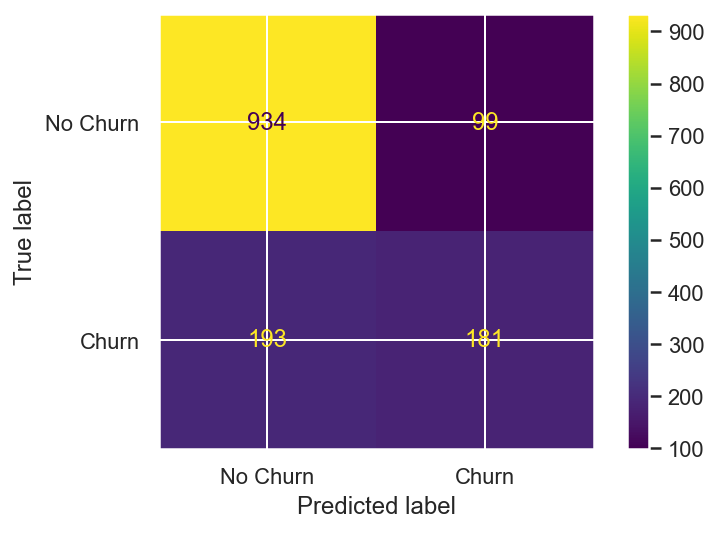

In [91]:
plot_confusion_matrix(clf_xgb, 
                      x_test, 
                      y_test,
                      values_format='d',
                      display_labels=["No Churn", "Churn"])

In [94]:
## 
## I ran GridSearchCV sequentially on subsets of parameter options, rather than all at once
## in order to optimize parameters in a short period of time.

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [.5, 1, 3] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output: 'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1
## ROUND 2
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [.05, 0.1, 0.5],
    'gamma': [0.5, 1, 1.25],
    'reg_lambda': [5,7,10.0,],
     'scale_pos_weight': [ .5, 1, 3]
}
## Output: max_depth: 4, learning_rate: 0.1, reg_lambda: 10.


optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric="logloss", ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0, 
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_train, 
                   y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


After testing all possible combinations of the potential parameter values with **Cross Validation**, we see that we should set `gamma=1`, `learn_rate=0.1`, `max_depth=3`, and `reg_lambda=10`.

In [98]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=50,
            eval_metric='aucpr',
            eval_set=[(x_val, y_val)])

xgb_preds=clf_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, xgb_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, xgb_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, xgb_preds)

[0]	validation_0-aucpr:0.54692
[1]	validation_0-aucpr:0.56261
[2]	validation_0-aucpr:0.60281
[3]	validation_0-aucpr:0.63281
[4]	validation_0-aucpr:0.63463
[5]	validation_0-aucpr:0.65552
[6]	validation_0-aucpr:0.65593
[7]	validation_0-aucpr:0.65638
[8]	validation_0-aucpr:0.65497
[9]	validation_0-aucpr:0.65943
[10]	validation_0-aucpr:0.65787
[11]	validation_0-aucpr:0.66168
[12]	validation_0-aucpr:0.66251
[13]	validation_0-aucpr:0.66152
[14]	validation_0-aucpr:0.66668
[15]	validation_0-aucpr:0.66984
[16]	validation_0-aucpr:0.66898
[17]	validation_0-aucpr:0.66998
[18]	validation_0-aucpr:0.67210
[19]	validation_0-aucpr:0.67504
[20]	validation_0-aucpr:0.67634
[21]	validation_0-aucpr:0.67626
[22]	validation_0-aucpr:0.67793
[23]	validation_0-aucpr:0.67800
[24]	validation_0-aucpr:0.67744
[25]	validation_0-aucpr:0.67726
[26]	validation_0-aucpr:0.67935
[27]	validation_0-aucpr:0.67941
[28]	validation_0-aucpr:0.68014
[29]	validation_0-aucpr:0.68057
[30]	validation_0-aucpr:0.68041
[31]	validation_0-

array([[720, 300],
       [ 58, 329]])

XGBoost Model best F2 score 0.762 at prob decision threshold >= 0.439


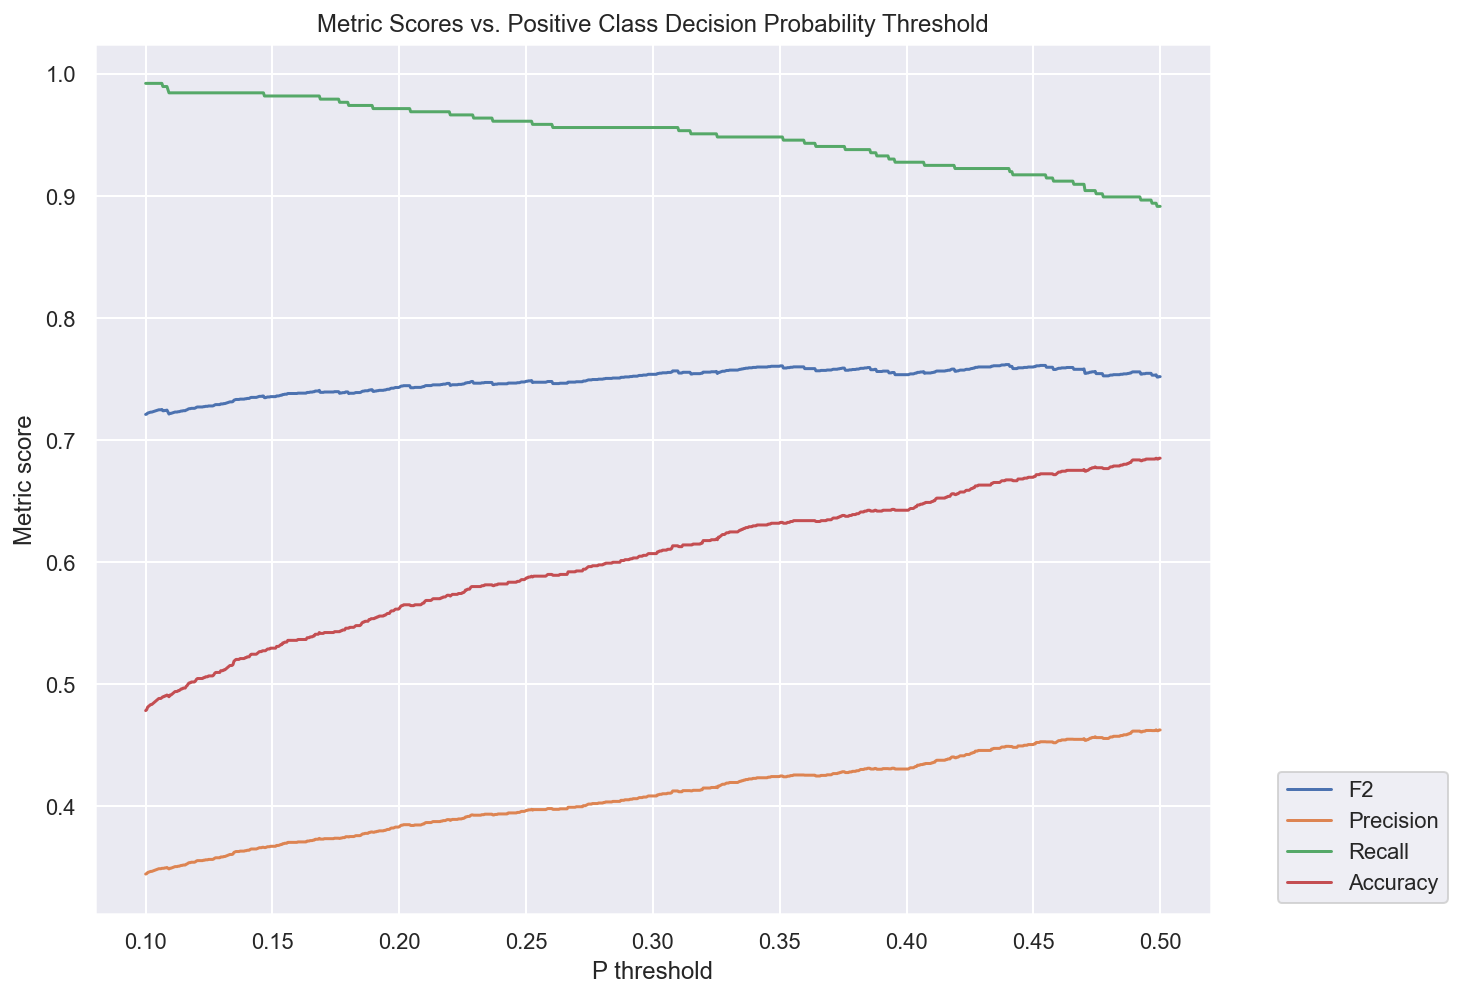

In [113]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('XGBoost Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

XGBoost best test F2 score 0.738 at prob decision threshold >= 0.407


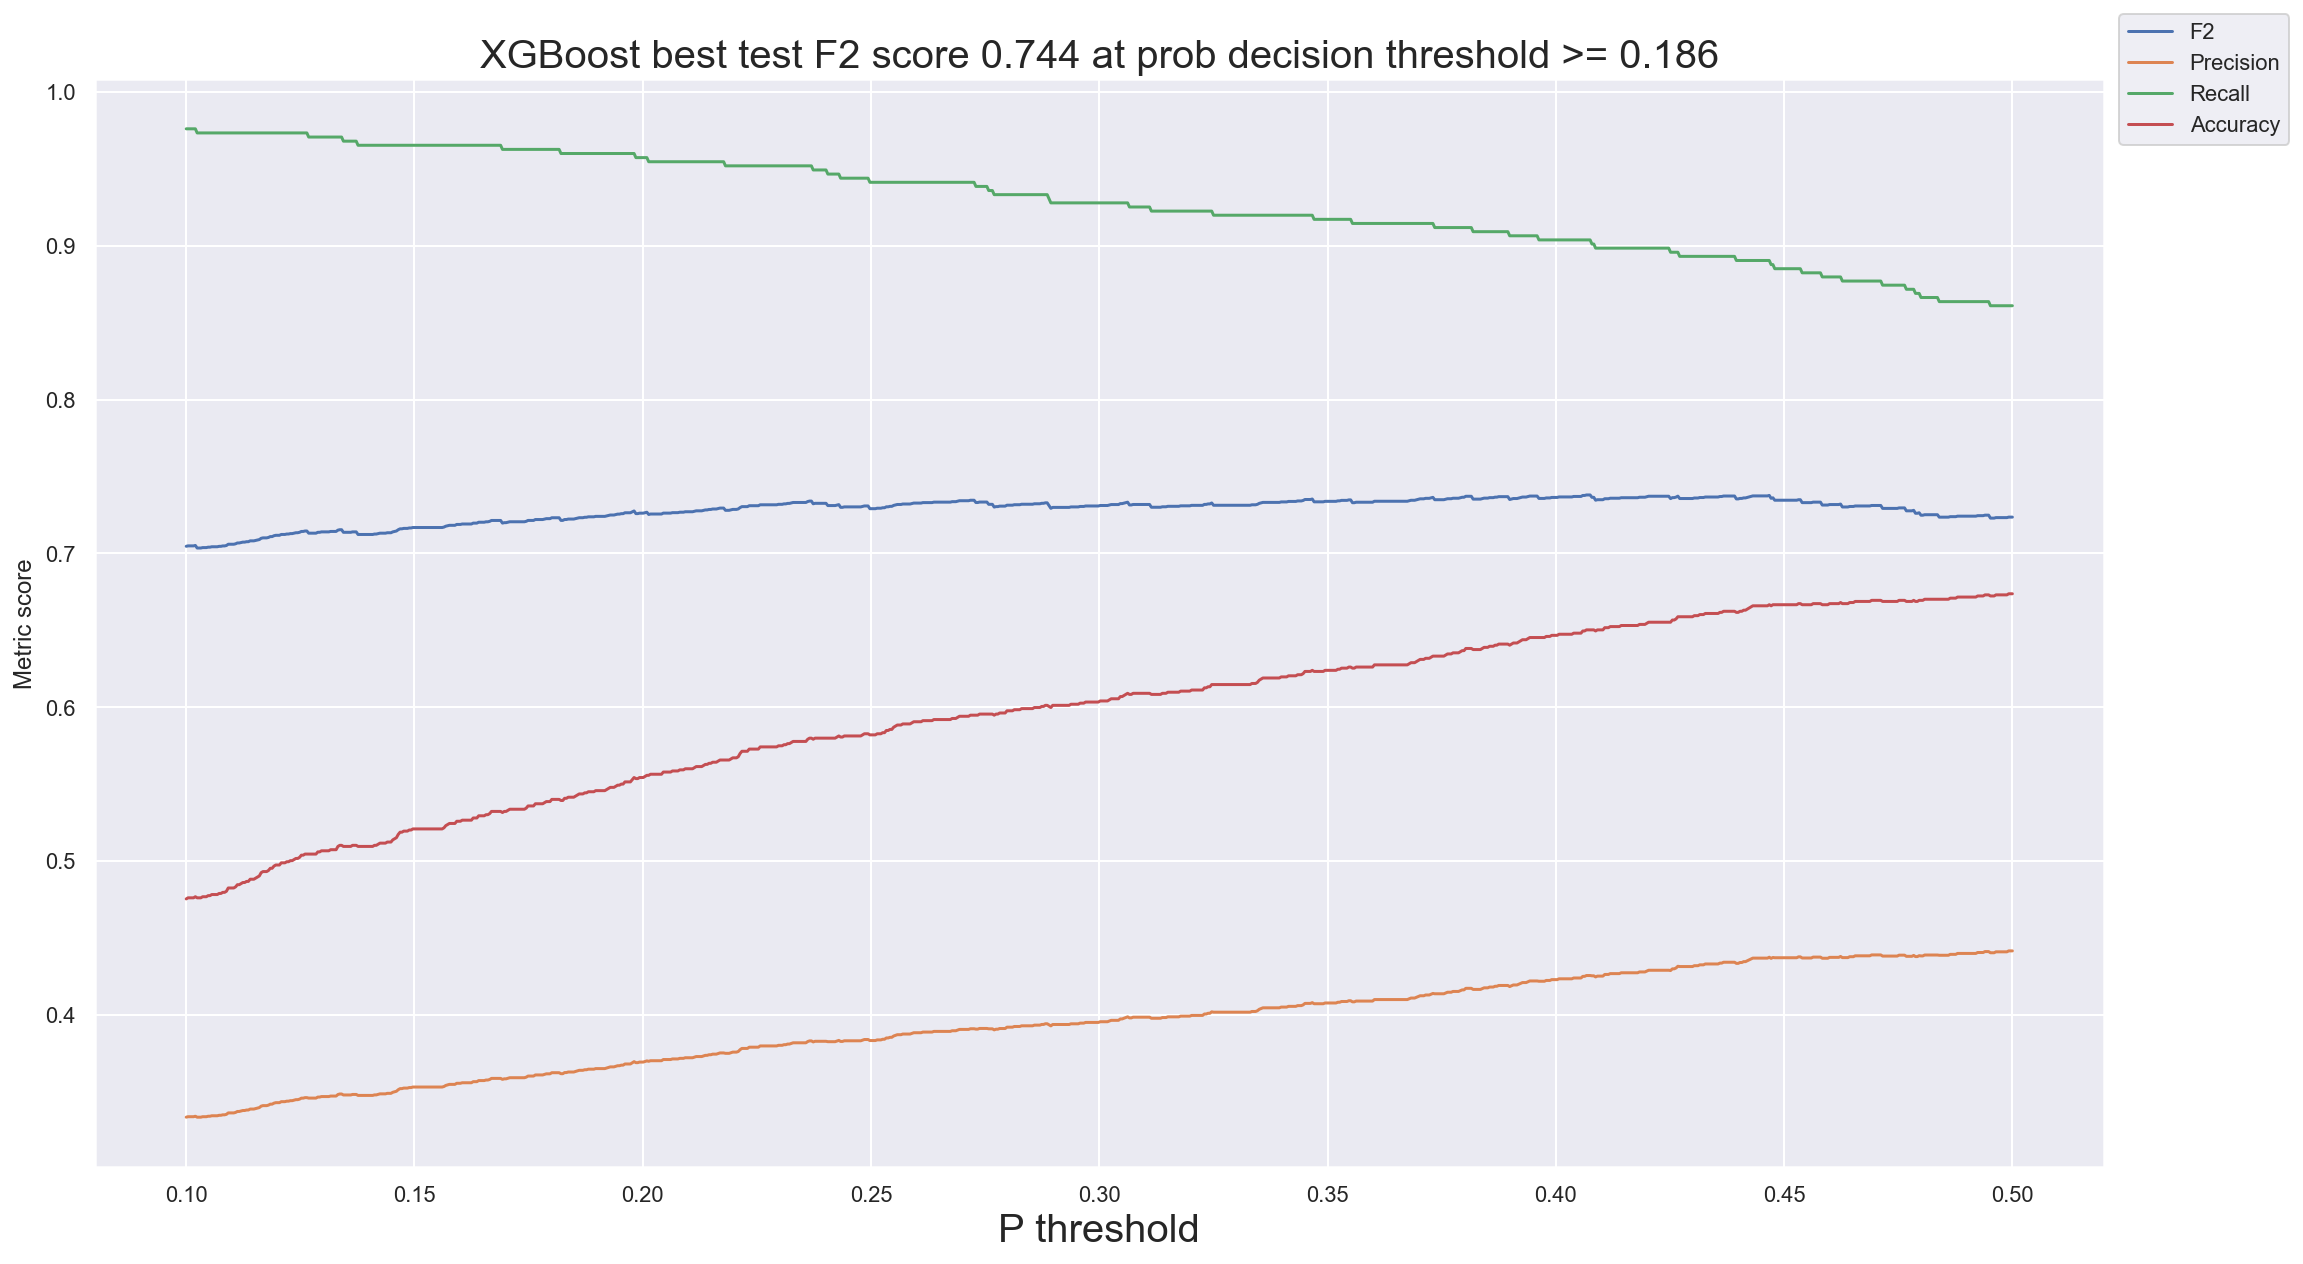

In [169]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = clf_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(18,10))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p),fontdict={'size': 20})
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold',fontdict={'size': 20})
plt.ylabel('Metric score')
plt.savefig('./pics/xgbtest.png')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* ### ok lets visit Adasyn now

In [101]:
## First lets find optimal parameters

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3,5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output1: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 3}

# Because most of our params were at the end were at the ends of their range, we will continue to those...

## ROUND 2
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [.01, 0.1, 1],
    'gamma': [0.25, .5, 1],
    'reg_lambda': [0,0.5,1.0,],
     'scale_pos_weight': [1, 3,5]
}
## Output2: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric="logloss", ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_adasyn, 
                   y_adasyn, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}


In [103]:
ada_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=0,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
ada_xgb.fit(x_adasyn, 
            y_adasyn, 
            verbose=True, 
            early_stopping_rounds=50,
            eval_metric='aucpr',
            eval_set=[(x_val, y_val)])

ada_xgb_preds=ada_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, ada_xgb_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, ada_xgb_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_xgb_preds)

[0]	validation_0-aucpr:0.50540
[1]	validation_0-aucpr:0.56619
[2]	validation_0-aucpr:0.60325
[3]	validation_0-aucpr:0.62608
[4]	validation_0-aucpr:0.62400
[5]	validation_0-aucpr:0.61975
[6]	validation_0-aucpr:0.61162
[7]	validation_0-aucpr:0.61859
[8]	validation_0-aucpr:0.62149
[9]	validation_0-aucpr:0.61904
[10]	validation_0-aucpr:0.61637
[11]	validation_0-aucpr:0.61863
[12]	validation_0-aucpr:0.62121
[13]	validation_0-aucpr:0.62312
[14]	validation_0-aucpr:0.62253
[15]	validation_0-aucpr:0.62235
[16]	validation_0-aucpr:0.62127
[17]	validation_0-aucpr:0.62224
[18]	validation_0-aucpr:0.62379
[19]	validation_0-aucpr:0.61869
[20]	validation_0-aucpr:0.61826
[21]	validation_0-aucpr:0.61827
[22]	validation_0-aucpr:0.62665
[23]	validation_0-aucpr:0.62589
[24]	validation_0-aucpr:0.62906
[25]	validation_0-aucpr:0.62623
[26]	validation_0-aucpr:0.62652
[27]	validation_0-aucpr:0.62401
[28]	validation_0-aucpr:0.63238
[29]	validation_0-aucpr:0.63142
[30]	validation_0-aucpr:0.63227
[31]	validation_0-

array([[678, 342],
       [ 49, 338]])

In [104]:
ada_xgbtest_preds=ada_xgb.predict(x_test)
print(f'Val Recall score: {recall_score(y_test, ada_xgbtest_preds)} ')
print(f'Val F2 score: {fbeta_score(y_test, ada_xgbtest_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, ada_xgbtest_preds)

Val Recall score: 0.8128342245989305 
Val F2 score: 0.696608615948671 

 val confusion_matrix:


array([[651, 382],
       [ 70, 304]])

Logistic Regression Model best F2 score 0.763 at prob decision threshold >= 0.291


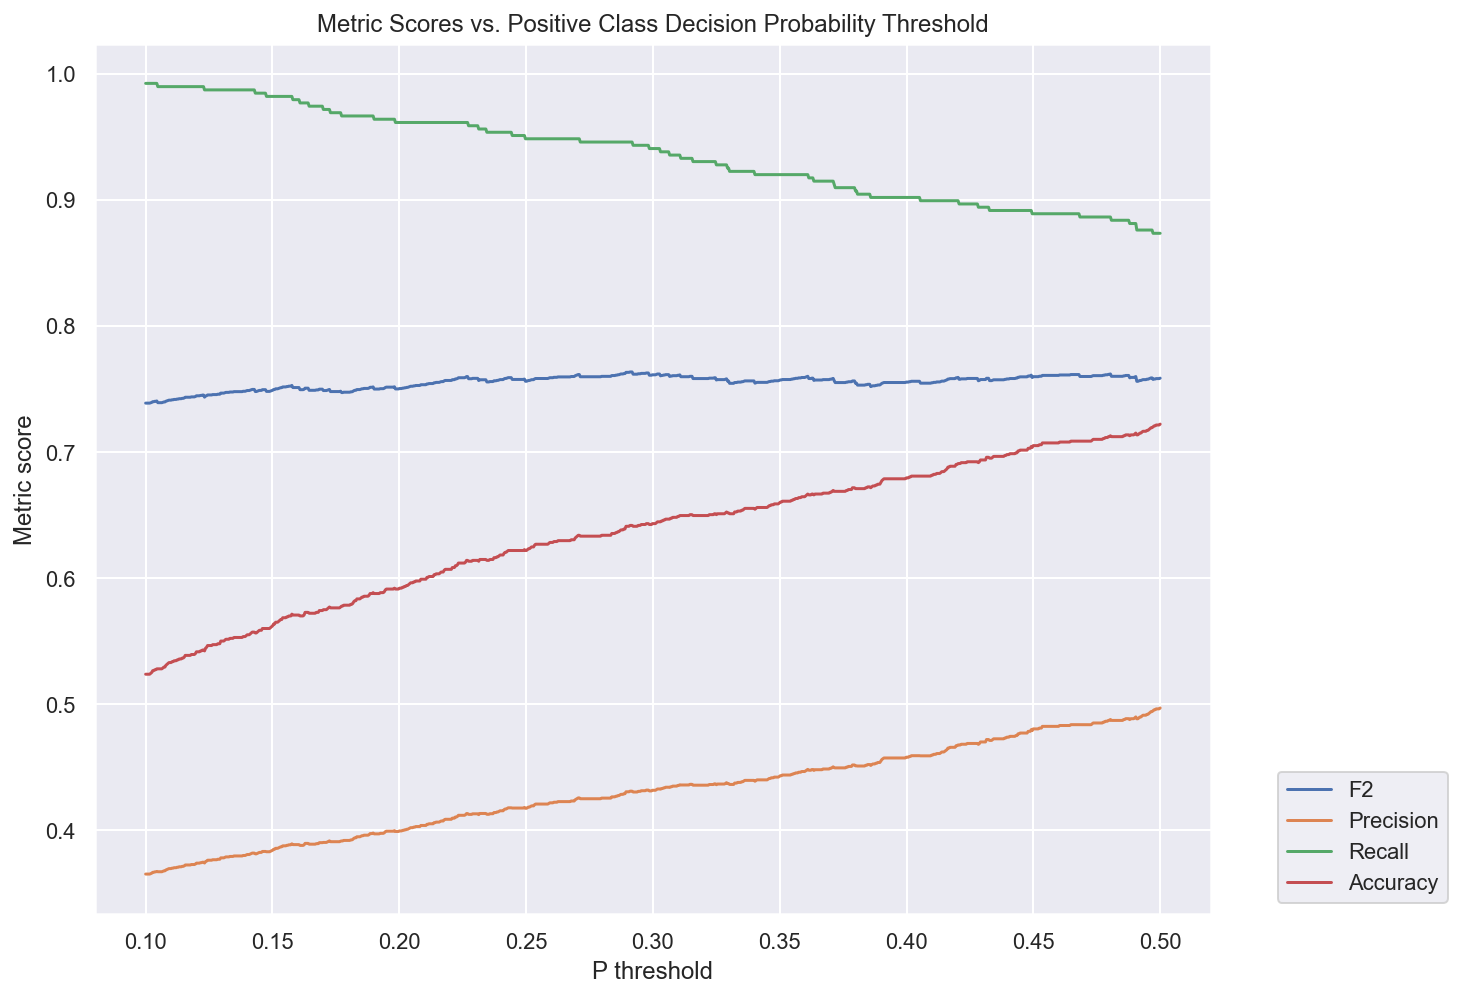

In [105]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = ada_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

ADASYN XGBoost best test F2 score 0.734 at prob decision threshold >= 0.193


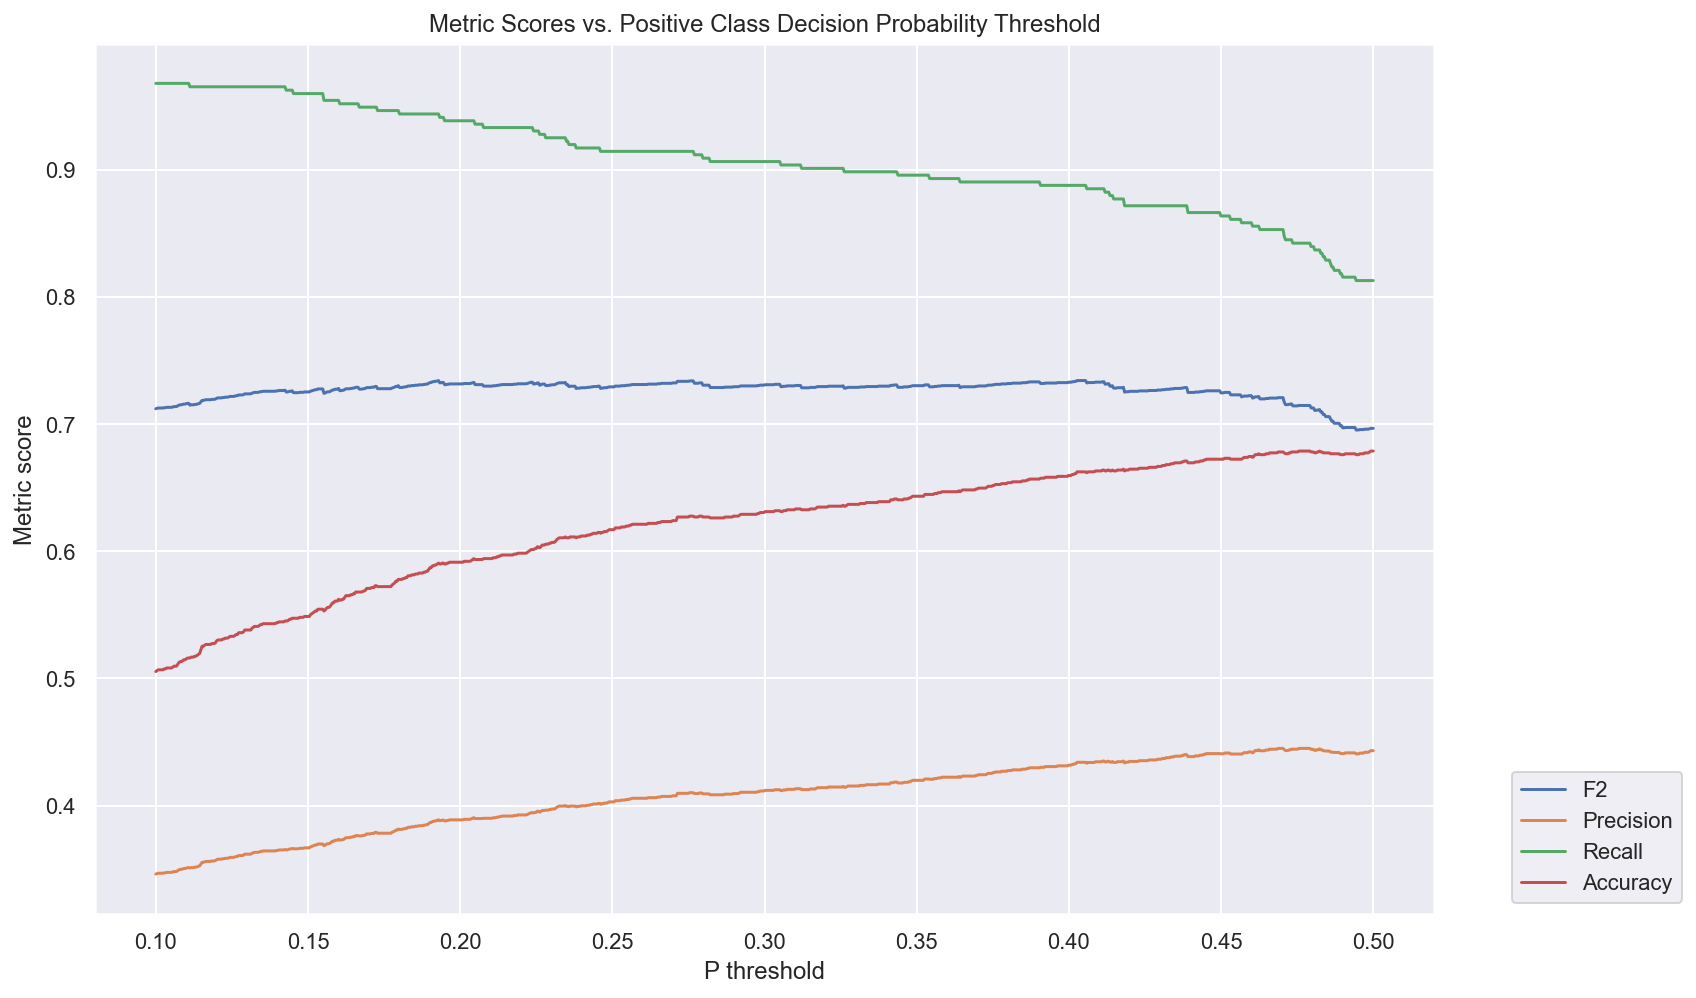

In [115]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = ada_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('ADASYN XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* ### Selected model is Random Forest

RF Hyper tunning

In [135]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [145]:
## First lets find optimal parameters
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(60,130,8)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [8, 10,12,15],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,4,6,8,10,12],
    'bootstrap': [True, False],
    }
# Output: 

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=2, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5)

rf_grid.fit(x_train, 
            y_train,) 

rf_grid.best_params_

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 80}

In [146]:
test_preds=rf_grid.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, test_preds)} ')
print(f'Val F2 score: {fbeta_score(y_test, test_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, test_preds)

Val Recall score: 0.4679144385026738 
Val F2 score: 0.4968767745599092 

 val confusion_matrix:


array([[943,  90],
       [199, 175]])

### we go ahead and find our thresh hold with the adjustment

Final RF Model best test F2 score 0.744 at prob decision threshold >= 0.186


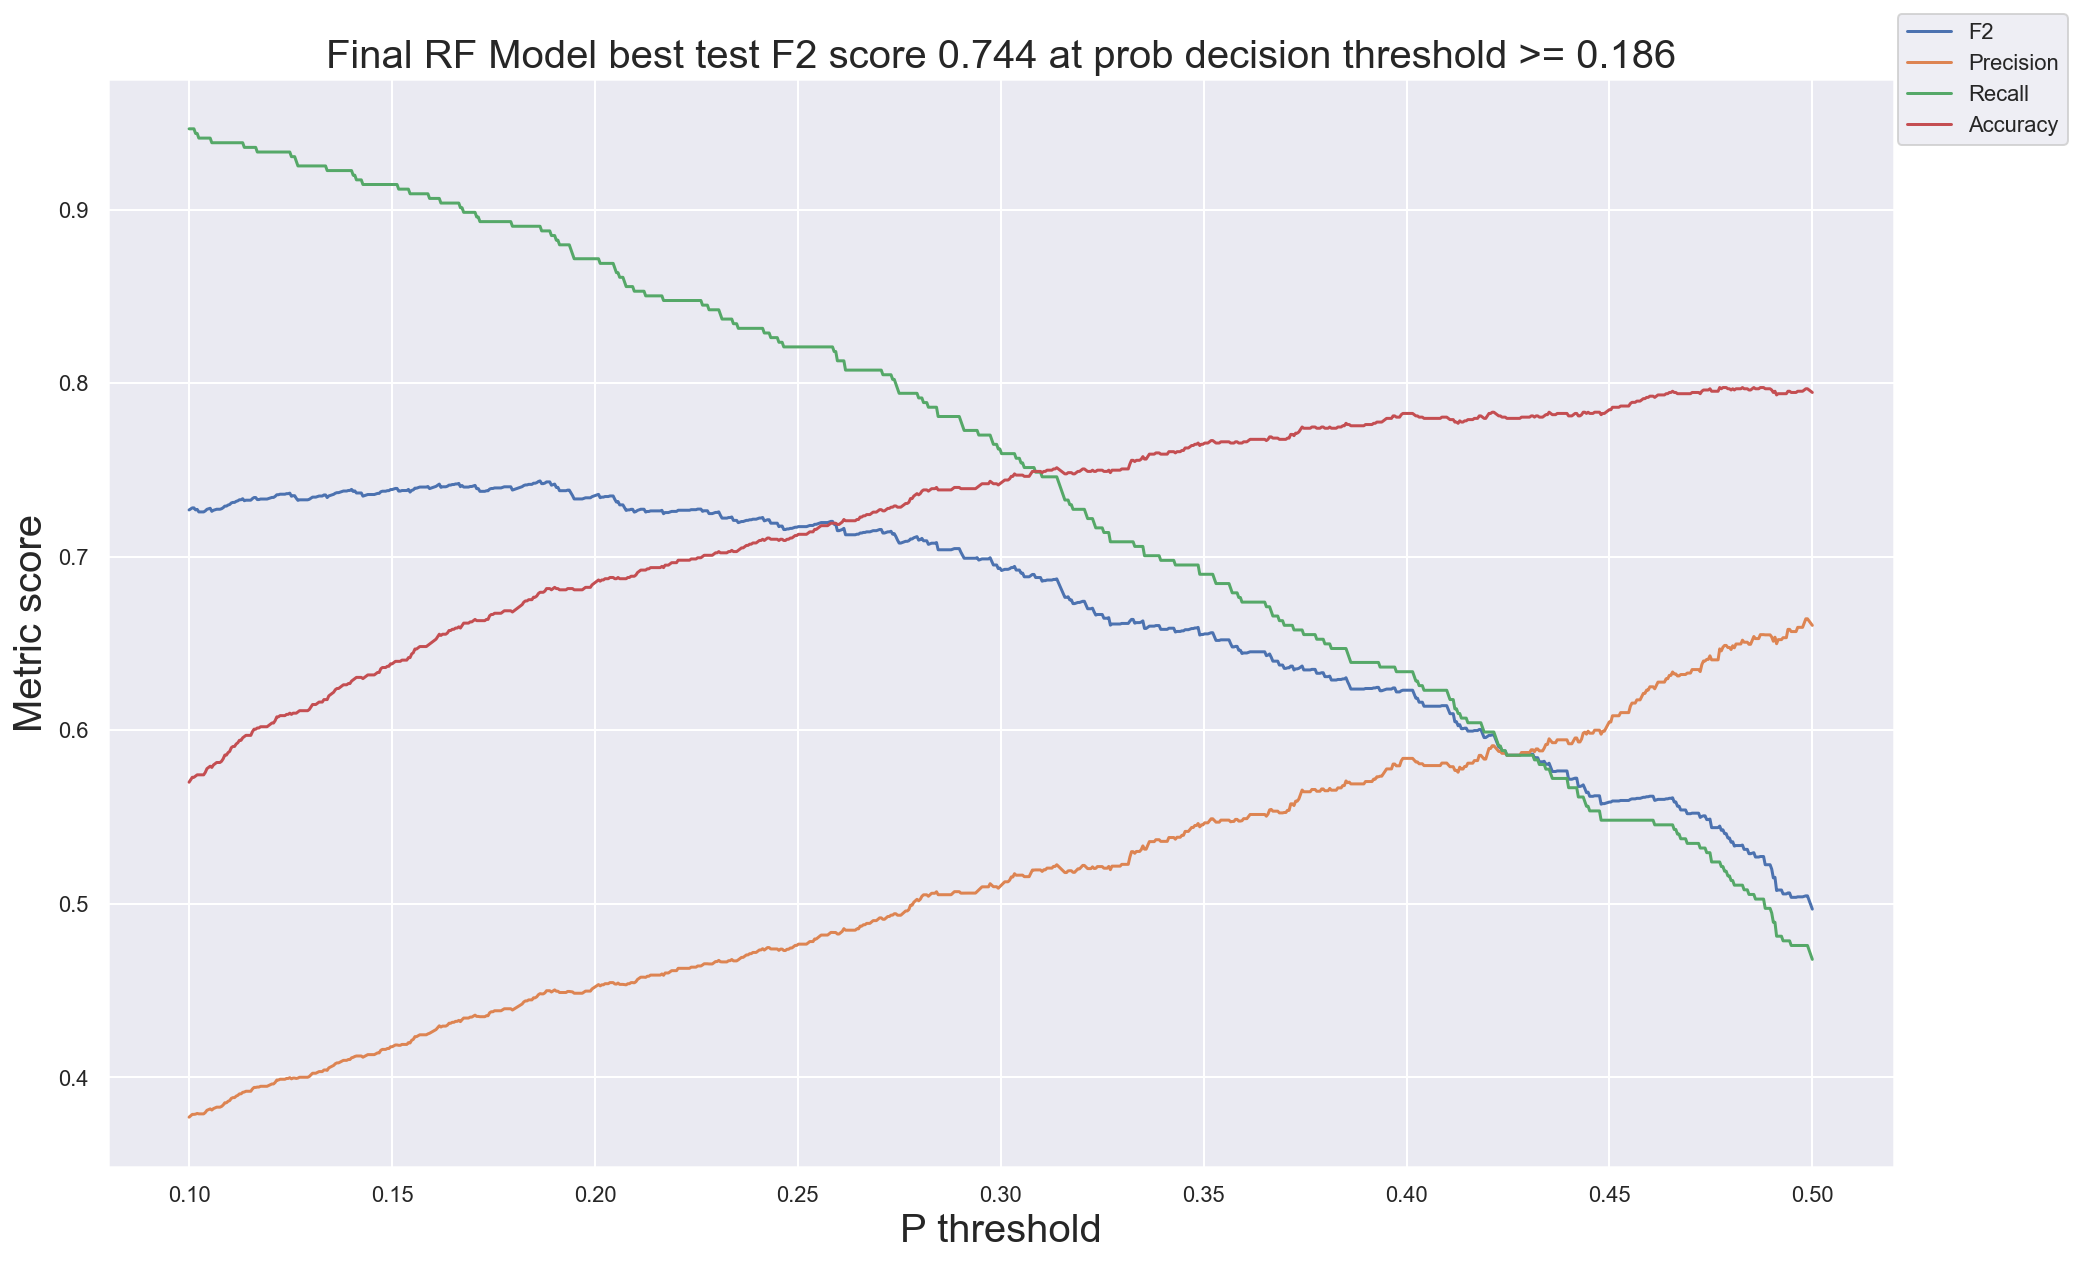

In [168]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_grid.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(16,10))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Final RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p), fontdict={'size': 20})
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold', fontdict={'size': 20})
plt.ylabel('Metric score',fontdict={'size': 20})
plt.savefig('./pics/rf_final.png')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Final RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [148]:
# lets save our model
import pickle as pkl
with open("models/rf_model.pkl", "wb") as f:
    pkl.dump(rf_grid, f)

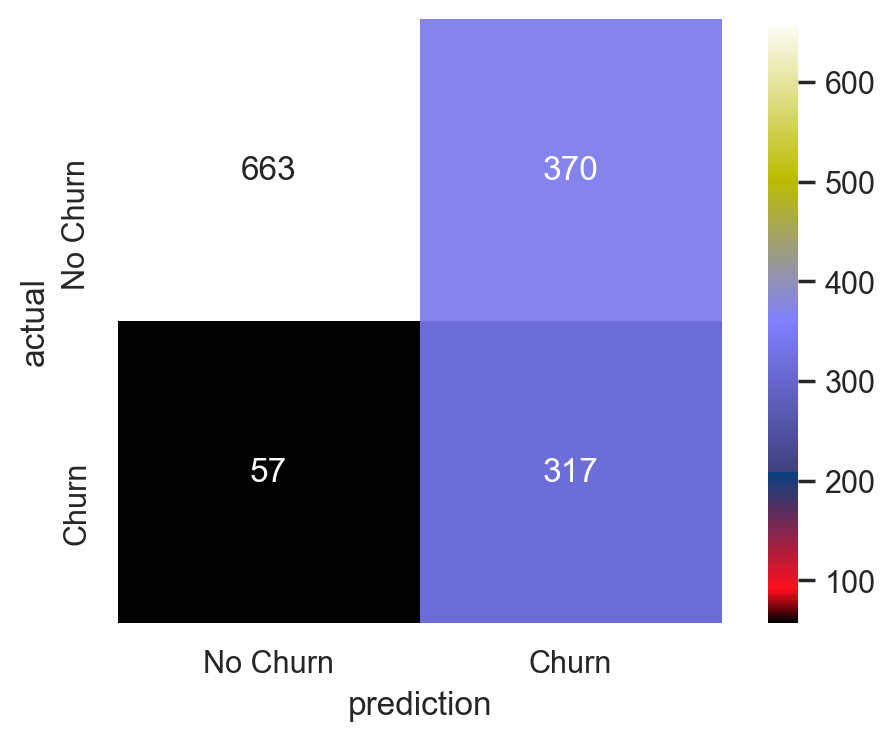

In [172]:
def make_confusion_matrix(model, threshold=0.22):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict_proba = (model.predict_proba(x_test)[:, 1] >= threshold)
    y_predict = model.predict(x_test)
    default_confusion = confusion_matrix(y_test, y_predict_proba)
    plt.figure(dpi=100)
    sns.heatmap(default_confusion, cmap=plt.cm.gist_stern, annot=True, square=True, fmt='d',
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.savefig('./pics/cmat.png')

make_confusion_matrix(rf_grid)